In [1]:
%matplotlib inline
# Imports Required for random forest
# Pandas is used for data manipulation, h5py for data (conda install h5py)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from os.path import join
from glob import glob
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import h5py
import numpy.ma as ma
import pvlib


In [2]:
data_path = "/d1/data/FDR-Idaho_csv/"
glob(data_path + "*.csv")
#data_path = "/d1/data/FDR-Idaho/"
#glob(data_path + "*.csv")

['/d1/data/FDR-Idaho_csv/FRD_ECFlux_2015.csv',
 '/d1/data/FDR-Idaho_csv/FRD_ECFlux_2016.csv',
 '/d1/data/FDR-Idaho_csv/FRD_ECFlux_2015-2017.csv',
 '/d1/data/FDR-Idaho_csv/FRD_ECFlux_2017.csv']

In [3]:
idaho_flux_data = pd.read_csv('/d1/data/FDR-Idaho_csv/FRD_ECFlux_2015-2017.csv')
idaho_met_data = pd.read_csv('/d1/mccandle/FRD_TallTower_Met_2015-2017.csv')

In [4]:
idaho_flux_no_missing = idaho_flux_data.replace(-9999.0, np.NaN).dropna(axis=0,how='any')
print(idaho_flux_no_missing.shape)
print(idaho_flux_data.shape)
idaho_met_no_missing = idaho_met_data.replace(-999.0, np.NaN).dropna(axis=0,how='any')
print(idaho_met_no_missing.shape)
print(idaho_met_data.shape)

(42637, 11)
(52608, 11)
(295101, 44)
(315648, 44)


In [5]:
#print(idaho_flux_no_missing['h2o_flux'].min())

In [5]:
for col in idaho_flux_data.columns:
    print(col)
    
    
print(idaho_flux_data['date'][2])
print(idaho_flux_data['time'][2])

date
time
DOY
daytime
Tau
H
LE
co2_flux
h2o_flux
air_density
air_heat_capacity
1/1/2015
1:30


In [6]:
for col in idaho_met_data.columns:
    print(col)

Year
Month
Day
Hour
Minute
2m Wind Speed m/s
2m Wind Gust m/s
2m Wind Dir deg
2m Sigma Theta deg
10m Wind Speed m/s
10m Wind Gust m/s
10m Wind Dir deg
10m Sigma Theta deg
15m Wind Speed m/s
15m Wind Gust m/s
15m Wind Dir deg
15m Sigma Theta deg
45m Wind Speed m/s
45m Wind Gust m/s
45m Wind Dir deg
45m Sigma Theta deg
Top Wind Speed m/s
Top Wind Gust m/s
Top Wind Dir deg
Top Sigma Theta deg
2m Temp C
10m Temp C
15m Temp C
45m Temp C
Top Temp C
2m RH %
Solar Rad w/m^2
BP inches Hg
Rain inches
5cm Water Content
10cm Water Content
20cm Water Content
50cm Water Content
100cm Water Content
5cm Soil Temp C
10cm Soil Temp C
20cm Soil Temp C
50cm Soil Temp C
100cm Soil Temp C


In [7]:
idaho_met_no_missing['Year'].astype(int)
idaho_met_no_missing['Month'].astype(int)
idaho_met_no_missing['Day'].astype(int)
idaho_met_no_missing['Hour'].astype(int)
idaho_met_no_missing['Minute'].astype(int)

year = idaho_met_no_missing.iloc[1:,0]
month = idaho_met_no_missing.iloc[1:,1]
day = idaho_met_no_missing.iloc[1:,2]
hour = idaho_met_no_missing.iloc[1:,3]
minute = idaho_met_no_missing.iloc[1:,4]

#idaho_met_no_missing['date'] = pd.to_datetime((idaho_met_no_missing.Year*10000+idaho_met_no_missing.Month*100+idaho_met_no_missing.Day).apply(str),format='%Y%M%d')
#print(idaho_met_no_missing['date'][1:3])

idaho_met_no_missing['DateTime'] = idaho_met_no_missing[['Year', 'Month', 'Day', 'Hour','Minute']].apply(lambda s : datetime.datetime(*s),axis = 1)
print(idaho_met_no_missing['DateTime'][1:3])

idaho_flux_no_missing['DateTime'] = idaho_flux_no_missing.date.apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
#idaho_flux_no_missing['DateTime3'] = idaho_flux_no_missing.time.apply(lambda y: pd.to_datetime(y).strftime('%h:m'))
#idaho_flux_no_missing['DateTime2'] = pd.to_datetime(idaho_flux_no_missing.DateTime) 
#print(idaho_flux_no_missing['DateTime3'][-5:-1])

idaho_flux_no_missing['DateTime'] = idaho_flux_no_missing['DateTime'] + ' ' + idaho_flux_no_missing['time']
#print(idaho_flux_no_missing['Test'][-5:-1])
#idaho_flux_no_missing['DateTime'] = idaho_flux_no_missing.Test.apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d %H:%M:%S'))
idaho_flux_no_missing['DateTime'] = pd.to_datetime(idaho_flux_no_missing['DateTime'])
print(idaho_flux_no_missing['DateTime'][1:3])

result = pd.merge(idaho_met_no_missing,idaho_flux_no_missing,on='DateTime')
print(result)

1   2015-01-01 00:10:00
2   2015-01-01 00:15:00
Name: DateTime, dtype: datetime64[ns]
1   2015-01-01 01:00:00
2   2015-01-01 01:30:00
Name: DateTime, dtype: datetime64[ns]
       Year  Month  Day  Hour  Minute  2m Wind Speed m/s  2m Wind Gust m/s  \
0      2015      1    1     0      30                0.9               1.4   
1      2015      1    1     1       0                1.3               1.6   
2      2015      1    1     1      30                1.4               1.6   
3      2015      1    1     2       0                0.7               1.0   
4      2015      1    1     2      30                1.3               1.4   
5      2015      1    1     3       0                0.9               1.1   
6      2015      1    1     3      30                1.5               1.8   
7      2015      1    1     4       0                1.1               1.4   
8      2015      1    1     4      30                0.5               0.9   
9      2015      1    1     5       0           

                     apparent_zenith     zenith  apparent_elevation  \
DateTime                                                              
2015-01-01 00:30:00        83.931703  84.072456            6.068297   
2015-01-01 01:00:00        79.928223  80.018156           10.071777   
2015-01-01 01:30:00        76.290113  76.357078           13.709887   
2015-01-01 02:00:00        73.099478  73.153799           16.900522   
2015-01-01 02:30:00        70.428560  70.475234           19.571440   

                     elevation     azimuth  equation_of_time  
DateTime                                                      
2015-01-01 00:30:00   5.927544  129.463132         -3.195131  
2015-01-01 01:00:00   9.981844  135.100482         -3.204993  
2015-01-01 01:30:00  13.642922  141.075655         -3.214852  
2015-01-01 02:00:00  16.846201  147.410058         -3.224709  
2015-01-01 02:30:00  19.524766  154.103466         -3.234564  
(40684,)


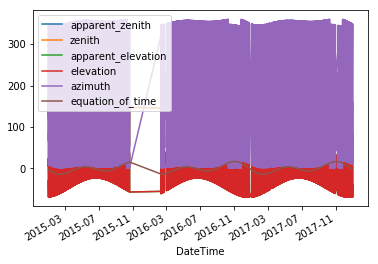

In [8]:
import pvlib
lat = 43.06
lon = 116.74
solpos = pvlib.solarposition.get_solarposition(result['DateTime'],lat,lon)
print(solpos.head())
solpos.plot()
print(solpos.zenith.shape)
result['solar_zenith_angle'] = np.array(solpos['zenith'])

In [12]:
test3 = np.array(result['air_heat_capacity'])
print(np.min(test3))

983.3962354678191


In [9]:
# Unit Conversion from C to K
def celsius_to_kelvin(temperature_c):
    return temperature_c + 273.15

# Unit Conversion from wind speed to wind components
def wind_components(wind_speed_m_s, wind_direction_degrees):
    math_dir = 270 - wind_direction_degrees
    math_dir[math_dir < 0] = 360 + math_dir[math_dir < 0]
    u = wind_speed_m_s * np.cos(np.radians(math_dir))
    v = wind_speed_m_s * np.sin(np.radians(math_dir))
    return u, v

# Unit Conversion from temperature and pressure to potential temperature
def inHg_to_hpa(pressure_inHg):
    """
    Convert pressure in inches of mercury (inHg) to pressure in hectopascals (hpa)

    Args:
        pressure_inHg: The air pressure in units inHg

    Returns:
        The air pressure in units hpa
    """
    return pressure_inHg * 33.86

def potential_temperature(temperature_k, pressure_hpa, pressure_reference_hpa=1000.0):
    """
    Convert temperature to potential temperature based on the available pressure. Potential temperature is at a
    reference pressure of 1000 mb.

    Args:
        temperature_k: The air temperature in units K
        pressure_hpa: The atmospheric pressure in units hPa
        pressure_reference_hpa: The reference atmospheric pressure for the potential temperature in hPa;
            default 1000 hPa

    Returns:
        The potential temperature in units K
    """
    return temperature_k * (pressure_reference_hpa / pressure_hpa) ** (2.0 / 7.0)

def friction_velocity(tau, density):
    """
    Compute friction velocity from tau and air density.

    Args:
        tau: The surface stress
        pressure_hpa: The atmospheric density in kg/m^3

    Returns:
        The friction velocity
    """
    u2 = np.array(result['Tau']) / np.array(result['air_density'])
    fv = np.sqrt(tau/density)
    return fv

def temperature_scale(sensible_heat_flux_W_m2, air_density_kg_m3, friction_velocity_m_s,
                      min_friction_velocity=0.001, min_sensible_heat_flux_mag=0.001):
    """
    Caclulate the temperature turbulence scale value theta* from the sensible heat flux.

    Args:
        sensible_heat_flux_W_m2: The sensible heat flux in units W m-2.
        air_density_kg_m3: The density of air in units kg m-3.
        friction_velocity_m_s: The friction velocity in units m s-1.

    Returns:
        The temperature turbulence scale value in units K.
    """
    heat_flux_sign = np.where(sensible_heat_flux_W_m2 >= 0, 1, -1)
    heat_flux_adjusted = heat_flux_sign * np.maximum(np.abs(sensible_heat_flux_W_m2), min_sensible_heat_flux_mag)
    return -heat_flux_adjusted / (air_density_kg_m3 * 287.0 * 7.0 / 2.0 *
                                  np.maximum(friction_velocity_m_s, min_friction_velocity))

def virtual_temperature(temperature_k, mixing_ratio_g_kg):
    """
    Convert temperature and mixing ratio to virtual temperature.

    Args:
        temperature_k: The temperature or potential temperature in units K.
        mixing_ratio_kg_kg: The mixing ratio in units kg kg-1.

    Returns:
        The virtual temperature in units K.
    """
    return temperature_k * (1 + 0.61 * mixing_ratio_g_kg / 1000.0)

def moisture_scale(latent_heat_flux_W_m2, air_density_kg_m3, friction_velocity_m_s,
                   min_friction_velocity=0.001, min_latent_heat_flux_mag=0.001):
    """
    Calculate the turblulent moisture scale factor from the latent heat flux.

    Args:
        latent_heat_flux_W_m2: Latent heat flux in units W m-2
        air_density_kg_m3: Density of air in units kg m-3
        friction_velocity_m_s: The friction velocity (u*) in units m s-1

    Returns:
        The turbulent moisture scale factor in g kg-1
    """
    latent_heat_of_vaporization_J_kg = 2264705.0  # J kg-1
    heat_flux_sign = np.where(latent_heat_flux_W_m2 >= 0, 1, -1)
    heat_flux_adjusted = heat_flux_sign * np.maximum(np.abs(latent_heat_flux_W_m2), min_latent_heat_flux_mag)
    g_per_kg = 1000.0
    return heat_flux_adjusted / (latent_heat_of_vaporization_J_kg * air_density_kg_m3
                                 * np.maximum(friction_velocity_m_s, min_friction_velocity)) * g_per_kg


def obukhov_length(potential_temperature_k, temperature_scale_k, friction_velocity_m_s, von_karman_constant=0.4,
                   min_friction_velocity=0.01, min_temperature_scale=0.01):
    """
    Caclulates the Obukhov length, a measure of stability based on the friction velocity and temperature scale.

    Args:
        potential_temperature_k: The potential temperature in units K
        temperature_scale_k: The turbulent temperature scale (theta*) in units K
        friction_velocity_m_s: The friction velocity (u*) in units m s-1
        von_karman_constant: The von Karman constant (default=0.4)

    Returns:
        The Obukhov length in units m.
    """
    g = 9.81 # m s-2
    temperature_scale_sign = np.where(temperature_scale_k >= 0, 1, -1)
    adjusted_temperature_scale = temperature_scale_sign * np.maximum(np.abs(temperature_scale_k), min_temperature_scale)
    return np.maximum(friction_velocity_m_s, min_friction_velocity) ** 2 * potential_temperature_k / (
            von_karman_constant * g * adjusted_temperature_scale)

def mixing_ratio(temp_2m_C, relative_humidity, pressure_hpa):
    """
    Calculate the mixing ratio.

    Args:
        temp_2m_C: 2-meter temperature in units of Celcius
        relative humidity: as a percentage
        pressure_hpa: atmospheric pressure in hPa

    Returns:
        The mixing ratio 
    """
    saturation_vapor_pressure= 0.6108 * np.exp(17.27 * temp_2m_C / (temp_2m_C + 237.3))
    vapor_pressure = relative_humidity / 100 * saturation_vapor_pressure 
    return 621.97 * vapor_pressure / (pressure_hpa-vapor_pressure), vapor_pressure, saturation_vapor_pressure

def bulk_richardson_number(potential_temperature_k, height,
                           mixing_ratio_g_kg, virtual_potential_skin_temperature_k, wind_speed_m_s,
                           minimum_wind_speed=1):
    """
    Calculate the bulk Richardson number, a measure of stability.

    Args:
        potential_temperature_k: The potential or virtual potential temperature in K
        height: The height at which the potential temperature calculation is performed in m.
        mixing_ratio_kg_kg: The mixing ratio at the same height as the potential temperature in units kg kg-1.
        virtual_potential_skin_temperature_k: The virtual potential temperature at the surface
        wind_speed_m_s: The wind speed in m s-1

    Returns:

    """
    g = 9.81  # m s-2
    virtual_potential_temperature_k = virtual_temperature(potential_temperature_k, mixing_ratio_g_kg)
    return g / potential_temperature_k * height * (virtual_potential_temperature_k
                                                   - virtual_potential_skin_temperature_k) / \
           np.maximum(wind_speed_m_s ** 2, minimum_wind_speed ** 2)

# Need to convert Idaho data from celsius to kelvin
result['2m Temp K'] = celsius_to_kelvin(result['2m Temp C'])
result['10m Temp K'] = celsius_to_kelvin(result['10m Temp C'])
result['15m Temp K'] = celsius_to_kelvin(result['15m Temp C'])
result['45m Temp K'] = celsius_to_kelvin(result['45m Temp C'])

# Need to convert Idaho data to wind components from speed and direction
result['2m U-Wind m/s'],result['2m V-Wind m/s'] = wind_components(result['2m Wind Speed m/s'],result['2m Wind Dir deg'])
result['10m U-Wind m/s'],result['10m V-Wind m/s'] = wind_components(result['10m Wind Speed m/s'],result['10m Wind Dir deg'])
result['15m U-Wind m/s'],result['15m V-Wind m/s'] = wind_components(result['15m Wind Speed m/s'],result['15m Wind Dir deg'])
result['45m U-Wind m/s'],result['45m V-Wind m/s'] = wind_components(result['45m Wind Speed m/s'],result['45m Wind Dir deg'])

# Need to convert temperatures in inches of mercury to hectopascals
result['Barometric Pressure hpa'] = inHg_to_hpa(result['BP inches Hg'])  

# Need to convert from Kelvin to Potential Temperature
result['2m potential temperature k'] = potential_temperature(result['2m Temp K'],result['Barometric Pressure hpa'])    
result['10m potential temperature k'] = potential_temperature(result['10m Temp K'],result['Barometric Pressure hpa'])
result['15m potential temperature k'] = potential_temperature(result['15m Temp K'],result['Barometric Pressure hpa'])
result['45m potential temperature k'] = potential_temperature(result['45m Temp K'],result['Barometric Pressure hpa'])

# Compute the friction velocity
result['friction velocity'] = friction_velocity(result['Tau'],result['air_density'])

# Compute the temperature scale
result['temperature scale'] = temperature_scale(result['H'],result['air_density'],result['friction velocity'])

# Compute the moisture scale
result['moisture scale'] = moisture_scale(result['LE'],result['air_density'],result['friction velocity'])

# Compute the Monin Obukhov Length
result['obukhov length'] = obukhov_length(result['2m potential temperature k'], result['temperature scale'], 
                                          result['friction velocity'], von_karman_constant=0.4)

# Compute the mixing ratio
result['2m mixing ratio g_kg'], vapor_pressure, saturation_vapor_pressure = mixing_ratio(result['2m Temp C'], result['2m RH %'], result['Barometric Pressure hpa'])

# Compute the virtual potential temperature
result['2m virtual potential temperature'] = virtual_temperature(result['2m potential temperature k'], 
                                                                 result['2m mixing ratio g_kg'])
# Compute the Bulk Richardson Number
result['bulk richardson number'] = bulk_richardson_number(result['2m potential temperature k'], 2, 
                                                          result['2m mixing ratio g_kg'], 
                                                          result['2m virtual potential temperature'], 
                                                          result['2m Wind Speed m/s'])


In [11]:
# Try computing Bulk Richardson Number between 10M and 2M
# Compute the Bulk Richardson Number
result['10m bulk richardson number'] = bulk_richardson_number(result['10m potential temperature k'], 10, 
                                                          result['2m mixing ratio g_kg'], 
                                                          result['2m virtual potential temperature'], 
                                                          result['2m Wind Speed m/s'])
# Try computing Bulk Richardson Number between 2M and 5cm soil temperature
# Compute the Bulk Richardson Number
# Compute the virtual potential temperature

result['5cm Soil Temp K'] = celsius_to_kelvin(result['5cm Soil Temp C'])
result['5cm potential temperature k'] = potential_temperature(result['5cm Soil Temp K'],result['Barometric Pressure hpa'])
result['5cm virtual potential temperature'] = virtual_temperature(result['5cm potential temperature k'], 
                                                                 result['2m mixing ratio g_kg'])
result['Soil bulk richardson number'] = bulk_richardson_number(result['2m potential temperature k'], 10, 
                                                          result['2m mixing ratio g_kg'], 
                                                          result['5cm virtual potential temperature'], 
                                                          result['2m Wind Speed m/s'])

result["roughness length surface m"] = np.minimum(9, np.maximum(0.001, 10 * np.exp(-0.4 * np.maximum(result["10m Wind Speed m/s"], 1) / result["friction velocity"])))



In [12]:
print(result.head())

   Year  Month  Day  Hour  Minute  2m Wind Speed m/s  2m Wind Gust m/s  \
0  2015      1    1     0      30                0.9               1.4   
1  2015      1    1     1       0                1.3               1.6   
2  2015      1    1     1      30                1.4               1.6   
3  2015      1    1     2       0                0.7               1.0   
4  2015      1    1     2      30                1.3               1.4   

   2m Wind Dir deg  2m Sigma Theta deg  10m Wind Speed m/s  \
0            140.6                15.4                 0.9   
1            171.9                 6.3                 2.7   
2            204.5                 7.6                 2.7   
3            196.4                10.0                 2.2   
4            210.6                 4.5                 2.0   

              ...              obukhov length  2m mixing ratio g_kg  \
0             ...                   -1.071322              0.037588   
1             ...                    3.9

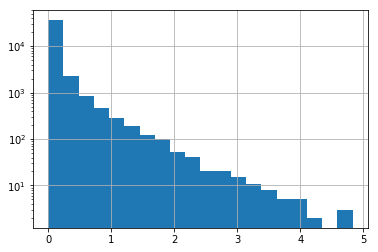

In [14]:
result["roughness length surface m"].hist(bins=20)
plt.gca().set_yscale("log")

(array([2989., 4162., 4731., 3990., 3562., 3279., 3235., 3575., 6133.,
        5028.]),
 array([ 5.27 , 14.353, 23.436, 32.519, 41.602, 50.685, 59.768, 68.851,
        77.934, 87.017, 96.1  ]),
 <a list of 10 Patch objects>)

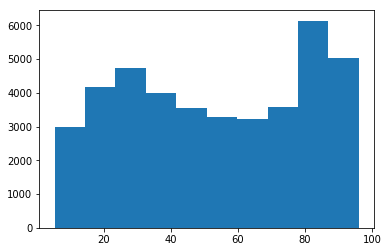

In [15]:
plt.hist(result['2m RH %'])

(array([7.975e+03, 6.755e+03, 7.557e+03, 8.108e+03, 4.617e+03, 3.139e+03,
        2.132e+03, 3.900e+02, 5.000e+00, 6.000e+00]),
 array([0.032 , 0.0686, 0.1052, 0.1418, 0.1784, 0.215 , 0.2516, 0.2882,
        0.3248, 0.3614, 0.398 ]),
 <a list of 10 Patch objects>)

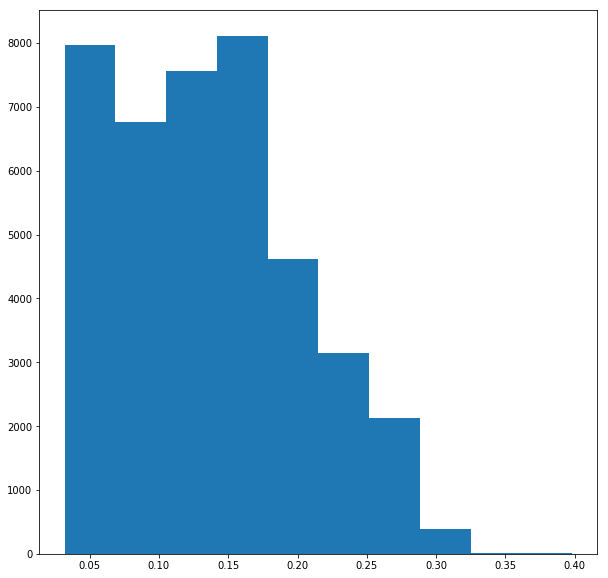

In [89]:
plt.hist(result['5cm Water Content'])

(array([ 214.,  501., 1686., 3943., 7474., 9100., 7894., 4994., 3625.,
        1253.]), array([255.80703427, 262.80851941, 269.81000454, 276.81148967,
        283.8129748 , 290.81445994, 297.81594507, 304.8174302 ,
        311.81891533, 318.82040047, 325.8218856 ]), <a list of 10 Patch objects>)

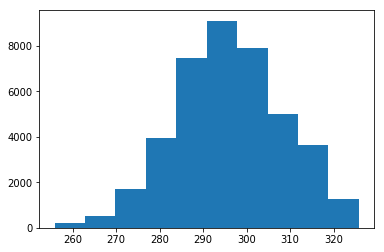

In [16]:
plt.hist(result['2m potential temperature k'])

(array([2.4230e+03, 9.0270e+03, 1.3114e+04, 8.5590e+03, 4.7490e+03,
        1.9140e+03, 6.3500e+02, 2.1400e+02, 4.0000e+01, 9.0000e+00]),
 array([0.03974489, 0.22832261, 0.41690032, 0.60547803, 0.79405575,
        0.98263346, 1.17121117, 1.35978888, 1.5483666 , 1.73694431,
        1.92552202]),
 <a list of 10 Patch objects>)

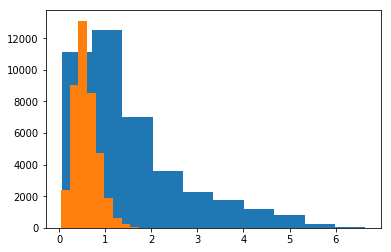

In [17]:
plt.hist(saturation_vapor_pressure)
plt.hist(vapor_pressure)

325.9374521782428
255.81157066648402
296.1770551641186
325.9374521782428
255.81157066648402
296.1770551641186
40684
40684
(40684,)


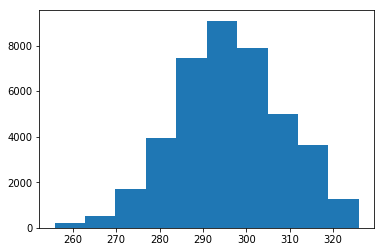

In [18]:
t = np.array(result['2m virtual potential temperature'])
print(np.max(t))
print(np.min(t))
print(np.mean(t))
result_no_missing = np.array(result['2m virtual potential temperature'].replace(-999.0, np.nan).dropna(axis=0,how='any'))
print(np.max(result_no_missing))
print(np.min(result_no_missing))
print(np.mean(result_no_missing))
plt.hist(result_no_missing)
print(np.size(t))
print(np.size(result_no_missing))
print(result['2m Wind Speed m/s'].shape)

(array([2.240e+02, 2.900e+02, 3.960e+02, 6.640e+02, 8.620e+02, 1.160e+03,
        1.399e+03, 1.799e+03, 2.185e+03, 2.508e+03, 2.805e+03, 2.555e+03,
        2.521e+03, 2.718e+03, 2.488e+03, 2.067e+03, 2.061e+03, 1.760e+03,
        1.358e+03, 1.290e+03, 1.121e+03, 1.137e+03, 9.500e+02, 8.200e+02,
        7.310e+02, 5.840e+02, 4.720e+02, 3.410e+02, 2.780e+02, 2.300e+02,
        2.120e+02, 1.360e+02, 1.250e+02, 1.010e+02, 6.700e+01, 6.600e+01,
        4.700e+01, 4.800e+01, 3.400e+01, 2.600e+01, 1.200e+01, 9.000e+00,
        1.000e+01, 6.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00]),
 array([0.02907155, 0.05671909, 0.08436662, 0.11201415, 0.13966168,
        0.16730922, 0.19495675, 0.22260428, 0.25025181, 0.27789935,
        0.30554688, 0.33319441, 0.36084194, 0.38848947, 0.41613701,
        0.44378454, 0.47143207, 0.4990796 , 0.52672714, 0.55437467,
        0.5820222 , 0.60966973, 0.63731727, 0.6649648 , 0.69261233,
        0.72025986, 0.7479074 , 0.77

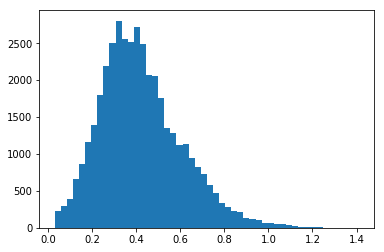

In [19]:
plt.hist(result['2m mixing ratio g_kg'],bins=50)

(array([18876., 21808.]), array([-1.,  0.,  1.]), <a list of 2 Patch objects>)

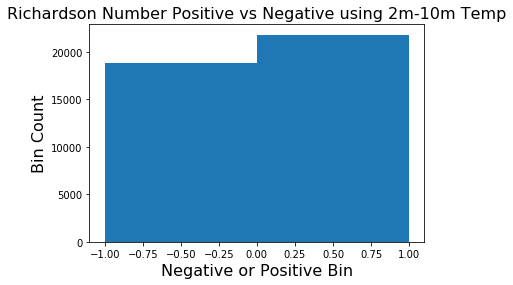

In [20]:
result['10m bulk richardson number'].drop(result['10m bulk richardson number'].idxmax())
result["BRN_sign"] = np.sign(result['10m bulk richardson number'])
plt.title('Richardson Number Positive vs Negative using 2m-10m Temp', size = 16)
plt.xlabel('Negative or Positive Bin', size = 16)
plt.ylabel('Bin Count', size = 16)
plt.hist(result["BRN_sign"],bins=2)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00,
        2.0000e+00, 5.0000e+00, 1.5000e+01, 3.5000e+01, 9.2000e+01,
        2.3800e+02, 5.6600e+02, 1.7090e+03, 5.5500e+03, 1.6996e+04,
        2.8320e+03, 1.3390e+03, 1.0160e+03, 8.9400e+02, 8.0600e+02,
        7.4600e+02, 6.7700e+02, 6.3000e+02, 5.8300e+02, 5.1000e+02,
        5.2100e+02, 4.6000e+02, 4.1500e+02, 3.8500e+02, 3.3200e+02,
        2.9200e+02, 3.0100e+02, 2.2500e+02, 2.3800e+02, 2.0300e+02,
        2.0300e+02, 1.8100e+02, 1.6700e+02, 1.5700e+02, 1.3900e+02,
        1.0800e+02, 1.0800e+02, 1.1500e+02, 8.7000e+01, 7.9000e+01,
        6.9000e+01, 6.6000e+01, 6.3000e+01, 8.3000e+01, 5.2000e+01,
        5.3000e+01, 4.7000e+01, 4.1000e+01, 3.4000e+01, 2.8000e+01,
        2.2000e+01, 1.8000e+01, 1.9000e+01, 2.4000e+01, 1.5000e+01,
        1.3000e+01, 1.1000e+01, 1.0000e+01, 9.0000e+00, 7.0000e+00,
        7.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00, 3.0000e+00,
        2.0000e+00, 4.0000e+00, 2.0000e+00, 3.00

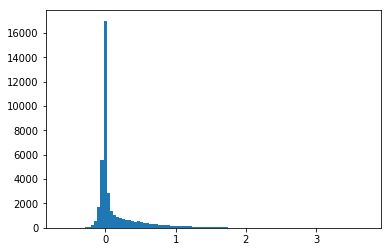

In [21]:
plt.hist(result['10m bulk richardson number'],bins=100)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        4.0000e+00, 3.0000e+00, 4.0000e+00, 8.0000e+00, 6.0000e+00,
        1.0000e+00, 6.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        2.0000e+00, 6.0000e+00, 4.0000e+00, 8.0000e+00, 1.0000e+00,
        8.0000e+00, 8.0000e+00, 7.0000e+00, 3.0000e+00, 6.0000e+00,
        9.0000e+00, 8.0000e+00, 1.3000e+01, 6.0000e+00, 1.3000e+01,
        2.2000e+01, 1.6000e+01, 1.8000e+01, 2.2000e+01, 2.2000e+01,
        2.0000e+01, 2.1000e+01, 2.4000e+01, 2.9000e+01, 4.0000e+01,
        4.6000e+01, 5.2000e+01, 6.7000e+01, 7.8000e+01, 8.8000e+01,
        1.1700e+02, 1.2600e+02, 1.6400e+02, 1.9000e+02, 2.4300e+02,
        2.4700e+02, 2.6900e+02, 3.3500e+02, 3.3800e+02, 3.6500e+02,
        4.0200e+02, 4.5000e+02, 5.5700e+02, 5.3200e+02, 6.2700e+02,
        6.6700e+02, 7.4300e+02, 8.4400e+02, 9.2500e+02, 1.0510e+03,
        1.2560e+03, 1.4050e+03, 1.6660e+03, 2.19

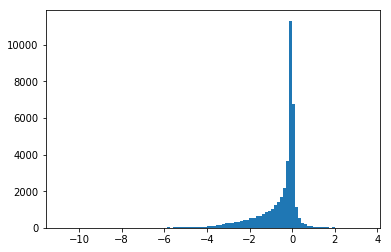

In [22]:
plt.hist(result['Soil bulk richardson number'],bins=100)

(array([31906.,  8778.]), array([-1.,  0.,  1.]), <a list of 2 Patch objects>)

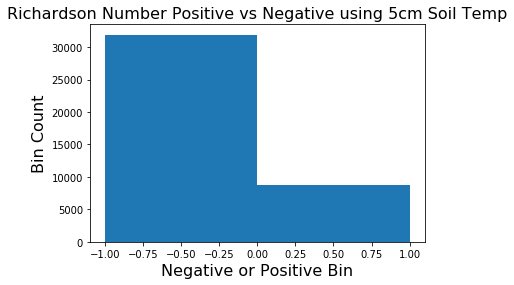

In [23]:
result['Soil bulk richardson number'].drop(result['Soil bulk richardson number'].idxmin())
result["BRN_sign_5cm"] = np.sign(result['Soil bulk richardson number'])
plt.title('Richardson Number Positive vs Negative using 5cm Soil Temp', size = 16)
plt.xlabel('Negative or Positive Bin', size = 16)
plt.ylabel('Bin Count', size = 16)
plt.hist(result["BRN_sign_5cm"],bins=2)

In [24]:
# Subset into different years for training and testing
# Set training years as 2015, 2016 and predict 2017
#resultTest = result[(result['Year'] == 2017)]
#resultTrain = result[(result['Year'] != 2017)]
# Set training years as 2015, 2017 and predict 2016
#resultTest = result[(result['Year'] == 2016)]
#resultTrain = result[(result['Year'] != 2016)]
# Set training years as 2016, 2017 and predict 2015
resultTest = result[(result['Year'] == 2015)]
resultTrain = result[(result['Year'] != 2015)]
print(resultTrain.shape)
print(resultTest.shape)

(28914, 89)
(11770, 89)


(array([1789., 2576., 3270., 3805., 3377., 3443., 4406., 3043., 1946.,
        1259.]), array([ 19.85957315,  33.89814534,  47.93671753,  61.97528971,
         76.0138619 ,  90.05243408, 104.09100627, 118.12957846,
        132.16815064, 146.20672283, 160.24529501]), <a list of 10 Patch objects>)

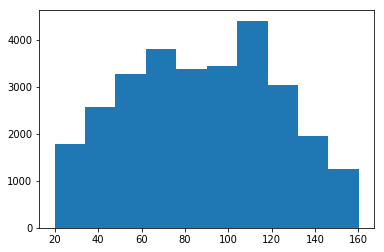

In [25]:
plt.hist(resultTrain['solar_zenith_angle'])

In [26]:
dataset = pd.DataFrame()
# Create datasets for training and testing.  
# Predictors to use:
dataset['2m potential temperature k'] = resultTrain['2m potential temperature k']
dataset['10m potential temperature k'] = resultTrain['10m potential temperature k']
dataset['15m potential temperature k'] = resultTrain['15m potential temperature k']
dataset['45m potential temperature k'] = resultTrain['45m potential temperature k']
dataset['2m U-Wind m/s'] = resultTrain['2m U-Wind m/s']
dataset['2m V-Wind m/s'] = resultTrain['2m V-Wind m/s']
dataset['10m U-Wind m/s'] = resultTrain['2m U-Wind m/s']
dataset['10m V-Wind m/s'] = resultTrain['2m V-Wind m/s']
dataset['15m U-Wind m/s'] = resultTrain['2m U-Wind m/s']
dataset['15m V-Wind m/s'] = resultTrain['2m V-Wind m/s']
dataset['45m U-Wind m/s'] = resultTrain['2m U-Wind m/s']
dataset['45m V-Wind m/s'] = resultTrain['2m V-Wind m/s']
dataset['2m RH %'] = resultTrain['2m RH %']
dataset['Solar Rad w/m^2'] = resultTrain['Solar Rad w/m^2']
dataset['Barometric Pressure hpa'] = resultTrain['Barometric Pressure hpa']
dataset['solar zenith angle'] = resultTrain['solar_zenith_angle']
dataset['5cm Water Content'] = resultTrain['5cm Water Content']
dataset['5cm Soil Temp C'] = resultTrain['5cm Soil Temp C']
dataset['2m Temp K'] = resultTrain['2m Temp K']

datasetTest = pd.DataFrame()
# Create datasets for training and testing.  
# Predictors to use:
datasetTest['2m potential temperature k'] = resultTest['2m potential temperature k']
datasetTest['10m potential temperature k'] = resultTest['10m potential temperature k']
datasetTest['15m potential temperature k'] = resultTest['15m potential temperature k']
datasetTest['45m potential temperature k'] = resultTest['45m potential temperature k']
datasetTest['2m U-Wind m/s'] = resultTest['2m U-Wind m/s']
datasetTest['2m V-Wind m/s'] = resultTest['2m V-Wind m/s']
datasetTest['10m U-Wind m/s'] = resultTest['2m U-Wind m/s']
datasetTest['10m V-Wind m/s'] = resultTest['2m V-Wind m/s']
datasetTest['15m U-Wind m/s'] = resultTest['2m U-Wind m/s']
datasetTest['15m V-Wind m/s'] = resultTest['2m V-Wind m/s']
datasetTest['45m U-Wind m/s'] = resultTest['2m U-Wind m/s']
datasetTest['45m V-Wind m/s'] = resultTest['2m V-Wind m/s']
datasetTest['2m RH %'] = resultTest['2m RH %']
datasetTest['Solar Rad w/m^2'] = resultTest['Solar Rad w/m^2']
datasetTest['Barometric Pressure hpa'] = resultTest['Barometric Pressure hpa']
datasetTest['solar zenith angle'] = resultTest['solar_zenith_angle']
datasetTest['5cm Water Content'] = resultTest['5cm Water Content']
datasetTest['5cm Soil Temp C'] = resultTest['5cm Soil Temp C']
datasetTest['2m Temp K'] = resultTest['2m Temp K']
datasetTest['10m Temp K'] = resultTest['10m Temp K']

featuresM = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']
featuresB = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']
featuresF = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']

MoistureScaleTrain = resultTrain['moisture scale']
TemperatureScaleTrain = resultTrain['temperature scale']
FrictionVelocityTrain = resultTrain['friction velocity']

MoistureScaleTest = resultTest['moisture scale']
TemperatureScaleTest = resultTest['temperature scale']
FrictionVelocityTest = resultTest['friction velocity']

# Put in nomenclature so that either yearly or random split can be used
train_featuresM = dataset
train_labelsM = MoistureScaleTrain
train_featuresF = dataset
train_labelsF = FrictionVelocityTrain
train_featuresT = dataset
train_labelsT = TemperatureScaleTrain

test_featuresM = datasetTest
test_labelsM = MoistureScaleTest
test_featuresF = datasetTest
test_labelsF = FrictionVelocityTest
test_featuresT = datasetTest
test_labelsT = TemperatureScaleTest

## Below is only necessary for splitting data randomly...
# Split the data into training and testing sets
#train_featuresM, test_featuresM, train_labelsM, test_labelsM = train_test_split(dataset, MoistureScaleTrain, test_size = 0.00, random_state = 42)
#train_featuresF, test_featuresF, train_labelsF, test_labelsF = train_test_split(dataset, FrictionVelocityTrain, test_size = 0.00, random_state = 42)
#train_featuresT, test_featuresT, train_labelsT, test_labelsT = train_test_split(dataset, TemperatureScaleTrain, test_size = 0.00, random_state = 42)

# Split the data into training and testing sets
#train_featuresMT, test_featuresMT, train_labelsMT, test_labelsMT = train_test_split(datasetTest, MoistureScaleTest, test_size = 0.00, random_state = 42)
#train_featuresFT, test_featuresFT, train_labelsFT, test_labelsFT = train_test_split(datasetTest, FrictionVelocityTest, test_size = 0.00, random_state = 42)
#train_featuresTT, test_featuresTT, train_labelsTT, test_labelsTT = train_test_split(datasetTest, TemperatureScaleTest, test_size = 0.00, random_state = 42)

In [27]:
print(train_featuresM.iloc[:,0:18].shape)
print(test_featuresM.iloc[:,0:18].shape)

(28914, 18)
(11770, 18)


In [28]:
######### Configure and train the Random Forest ##############
# Import the Random Forest Model
# Instantiate model 
rfM = RandomForestRegressor(n_estimators= 100, random_state=2,criterion='mse',min_samples_split=4,min_samples_leaf=2)
rfT = RandomForestRegressor(n_estimators= 100, random_state=2,criterion='mse',min_samples_split=4,min_samples_leaf=2)
rfF = RandomForestRegressor(n_estimators= 100, random_state=2,criterion='mse',min_samples_split=4,min_samples_leaf=2)
# Train the model on training data
rfM.fit(train_featuresM.iloc[:,0:18], train_labelsM);
rfF.fit(train_featuresF.iloc[:,0:18], train_labelsF);
rfT.fit(train_featuresT.iloc[:,0:18], train_labelsT);

KeyboardInterrupt: 

In [ ]:
# Use the forest's predict method on the test data
predictionsM = rfM.predict(test_featuresM.iloc[:,0:18])
predictionsT = rfT.predict(test_featuresT.iloc[:,0:18])
predictionsF = rfF.predict(test_featuresF.iloc[:,0:18])

######### Compute Errors on Test Data #############
# Calculate the absolute errors
errorsM = abs(predictionsM - test_labelsM)
errorsT = abs(predictionsT - test_labelsT)
errorsF = abs(predictionsF - test_labelsF)
# Print out the mean absolute error (mae)
print('Mean Absolute Error for predicting Moisture Scale:', round(np.mean(errorsM), 4))
print('Mean Absolute Error for predicting Temperature Scale:', round(np.mean(errorsT), 4))
print('Mean Absolute Error for predicting Friction Velocity:', round(np.mean(errorsF), 4))
print('Moisture Scale Mean: ',np.mean(MoistureScaleTest))
print('Moisture Scale Standard Deviation: ',np.std(MoistureScaleTest))
print('Temperature Scale Mean: ',np.mean(TemperatureScaleTest))
print('Temperature Scale Standard Deviation: ',np.std(TemperatureScaleTest))
print('Friction Velocity Mean: ',np.mean(FrictionVelocityTest))
print('Friction Velocity Standard Deviation: ',np.std(FrictionVelocityTest))

In [ ]:
rf_preds = pd.DataFrame(index=datasetTest.index, columns=output_columns, dtype=float)
for o, output_column in enumerate(output_columns):
    rf_preds[output_column] = rf_models[o].predict(test_data.loc[:, input_columns])

1.2415310193721247


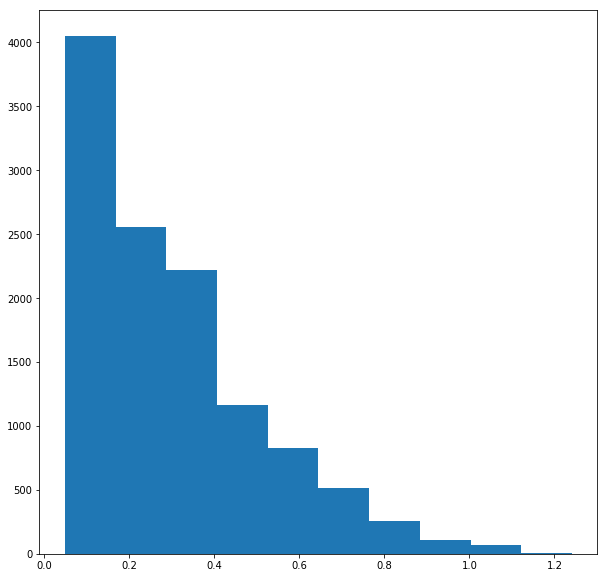

In [186]:
plt.hist(predictionsF)
print(np.max(predictionsF))

In [22]:
# Feature selection
importancesM = list(rfM.feature_importances_)
feature_listM = featuresM
feature_importancesM = [(featuresM,round(importancesM,2)) for featuresM, importancesM in zip(feature_listM,importancesM)]
feature_importancesM = sorted(feature_importancesM,key = lambda x: x[1],reverse=True)
print("Features importances for predicting moisture scale")
[print('Variable:{:20} Importance: {}'.format(*pair)) for pair in feature_importancesM];

# Feature selection
importancesT = list(rfT.feature_importances_)
feature_listT = featuresB
feature_importancesT = [(featuresT,round(importancesT,2)) for featuresT, importancesT in zip(feature_listT,importancesT)]
feature_importancesT = sorted(feature_importancesT,key = lambda x: x[1],reverse=True)
print("Features importances for predicting temperature scale")
[print('Variable:{:20} Importance: {}'.format(*pair)) for pair in feature_importancesT];

# Feature selection
importancesF = list(rfF.feature_importances_)
featuresF = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']
feature_listF = featuresF
feature_importancesF = [(featuresF,round(importancesF,2)) for featuresF, importancesF in zip(feature_listF,importancesF)]
feature_importancesF = sorted(feature_importancesF,key = lambda x: x[1],reverse=True)
print("Features importances for predicting friction velocity")
[print('Variable:{:20} Importance: {}'.format(*pair)) for pair in feature_importancesF];

Features importances for predicting moisture scale
Variable:Solar Rad w/m^2      Importance: 0.4
Variable:5cm Water Content    Importance: 0.17
Variable:5cm Soil Temp C      Importance: 0.09
Variable:2m RH %              Importance: 0.05
Variable:Barometric Pressure hpa Importance: 0.04
Variable:solar zenith angle   Importance: 0.03
Variable:2m potential temperature k Importance: 0.02
Variable:45m potential temperature k Importance: 0.02
Variable:2m U-Wind m/s        Importance: 0.02
Variable:2m V-Wind m/s        Importance: 0.02
Variable:10m U-Wind m/s       Importance: 0.02
Variable:10m V-Wind m/s       Importance: 0.02
Variable:15m U-Wind m/s       Importance: 0.02
Variable:15m V-Wind m/s       Importance: 0.02
Variable:45m U-Wind m/s       Importance: 0.02
Variable:45m V-Wind m/s       Importance: 0.02
Variable:10m potential temperature k Importance: 0.01
Variable:15m potential temperature k Importance: 0.01
Features importances for predicting temperature scale
Variable:Solar Rad w

In [85]:
# Let's do a test to see if separating by Bulk Richardson Number improves the accuracy of the random forest
result["BRN_sign"] = np.sign(result['10m bulk richardson number'])
resultTestP = resultTest[(resultTest['10m bulk richardson number'] > 0.0)]
resultTestN = resultTest[(resultTest['10m bulk richardson number'] < 0.0)]
resultTrainP = resultTrain[(resultTrain['10m bulk richardson number'] > 0.0)]
resultTrainN = resultTrain[(resultTrain['10m bulk richardson number'] < 0.0)]

datasetTestP = pd.DataFrame()
# Create datasets for training and testing.  
# Predictors to use:
datasetTestP['2m potential temperature k'] = resultTestP['2m potential temperature k']
datasetTestP['10m potential temperature k'] = resultTestP['10m potential temperature k']
datasetTestP['15m potential temperature k'] = resultTestP['15m potential temperature k']
datasetTestP['45m potential temperature k'] = resultTestP['45m potential temperature k']
datasetTestP['2m U-Wind m/s'] = resultTestP['2m U-Wind m/s']
datasetTestP['2m V-Wind m/s'] = resultTestP['2m V-Wind m/s']
datasetTestP['10m U-Wind m/s'] = resultTestP['2m U-Wind m/s']
datasetTestP['10m V-Wind m/s'] = resultTestP['2m V-Wind m/s']
datasetTestP['15m U-Wind m/s'] = resultTestP['2m U-Wind m/s']
datasetTestP['15m V-Wind m/s'] = resultTestP['2m V-Wind m/s']
datasetTestP['45m U-Wind m/s'] = resultTestP['2m U-Wind m/s']
datasetTestP['45m V-Wind m/s'] = resultTestP['2m V-Wind m/s']
datasetTestP['2m RH %'] = resultTestP['2m RH %']
datasetTestP['Solar Rad w/m^2'] = resultTestP['Solar Rad w/m^2']
datasetTestP['Barometric Pressure hpa'] = resultTestP['Barometric Pressure hpa']
datasetTestP['solar zenith angle'] = resultTestP['solar_zenith_angle']
datasetTestP['5cm Water Content'] = resultTestP['5cm Water Content']
datasetTestP['5cm Soil Temp C'] = resultTestP['5cm Soil Temp C']
datasetTestP['2m Temp K'] = resultTestP['2m Temp K']

#dataset['air_density'] = result['air_density']
#dataset['Tau'] = result['Tau']
featuresM = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']
featuresB = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']
featuresF = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']

MoistureScaleTestP = resultTestP['moisture scale']
TemperatureScaleTestP = resultTestP['temperature scale']
FrictionVelocityTestP = resultTestP['friction velocity']

datasetTestN = pd.DataFrame()
# Create datasets for training and testing.  
# Predictors to use:
datasetTestN['2m potential temperature k'] = resultTestN['2m potential temperature k']
datasetTestN['10m potential temperature k'] = resultTestN['10m potential temperature k']
datasetTestN['15m potential temperature k'] = resultTestN['15m potential temperature k']
datasetTestN['45m potential temperature k'] = resultTestN['45m potential temperature k']
datasetTestN['2m U-Wind m/s'] = resultTestN['2m U-Wind m/s']
datasetTestN['2m V-Wind m/s'] = resultTestN['2m V-Wind m/s']
datasetTestN['10m U-Wind m/s'] = resultTestN['2m U-Wind m/s']
datasetTestN['10m V-Wind m/s'] = resultTestN['2m V-Wind m/s']
datasetTestN['15m U-Wind m/s'] = resultTestN['2m U-Wind m/s']
datasetTestN['15m V-Wind m/s'] = resultTestN['2m V-Wind m/s']
datasetTestN['45m U-Wind m/s'] = resultTestN['2m U-Wind m/s']
datasetTestN['45m V-Wind m/s'] = resultTestN['2m V-Wind m/s']
datasetTestN['2m RH %'] = resultTestN['2m RH %']
datasetTestN['Solar Rad w/m^2'] = resultTestN['Solar Rad w/m^2']
datasetTestN['Barometric Pressure hpa'] = resultTestN['Barometric Pressure hpa']
datasetTestN['solar zenith angle'] = resultTestN['solar_zenith_angle']
datasetTestN['5cm Water Content'] = resultTestN['5cm Water Content']
datasetTestN['5cm Soil Temp C'] = resultTestN['5cm Soil Temp C']
datasetTestN['2m Temp K'] = resultTestN['2m Temp K']
#dataset['air_density'] = result['air_density']
#dataset['Tau'] = result['Tau']
featuresM = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']
featuresB = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']
featuresF = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']

MoistureScaleTestN = resultTestN['moisture scale']
TemperatureScaleTestN = resultTestN['temperature scale']
FrictionVelocityTestN = resultTestN['friction velocity']


datasetTrainN = pd.DataFrame()
# Create datasets for training and testing.  
# Predictors to use:
datasetTrainN['2m potential temperature k'] = resultTrainN['2m potential temperature k']
datasetTrainN['10m potential temperature k'] = resultTrainN['10m potential temperature k']
datasetTrainN['15m potential temperature k'] = resultTrainN['15m potential temperature k']
datasetTrainN['45m potential temperature k'] = resultTrainN['45m potential temperature k']
datasetTrainN['2m U-Wind m/s'] = resultTrainN['2m U-Wind m/s']
datasetTrainN['2m V-Wind m/s'] = resultTrainN['2m V-Wind m/s']
datasetTrainN['10m U-Wind m/s'] = resultTrainN['2m U-Wind m/s']
datasetTrainN['10m V-Wind m/s'] = resultTrainN['2m V-Wind m/s']
datasetTrainN['15m U-Wind m/s'] = resultTrainN['2m U-Wind m/s']
datasetTrainN['15m V-Wind m/s'] = resultTrainN['2m V-Wind m/s']
datasetTrainN['45m U-Wind m/s'] = resultTrainN['2m U-Wind m/s']
datasetTrainN['45m V-Wind m/s'] = resultTrainN['2m V-Wind m/s']
datasetTrainN['2m RH %'] = resultTrainN['2m RH %']
datasetTrainN['Solar Rad w/m^2'] = resultTrainN['Solar Rad w/m^2']
datasetTrainN['Barometric Pressure hpa'] = resultTrainN['Barometric Pressure hpa']
datasetTrainN['solar zenith angle'] = resultTrainN['solar_zenith_angle']
datasetTrainN['5cm Water Content'] = resultTrainN['5cm Water Content']
datasetTrainN['5cm Soil Temp C'] = resultTrainN['5cm Soil Temp C']
datasetTrainN['2m Temp K'] = resultTrainN['2m Temp K']
#dataset['air_density'] = result['air_density']
#dataset['Tau'] = result['Tau']
featuresM = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']
featuresB = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']
featuresF = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']

MoistureScaleTrainN = resultTrainN['moisture scale']
TemperatureScaleTrainN = resultTrainN['temperature scale']
FrictionVelocityTrainN = resultTrainN['friction velocity']

datasetTrainP = pd.DataFrame()
# Create datasets for training and testing.  
# Predictors to use:
datasetTrainP['2m potential temperature k'] = resultTrainP['2m potential temperature k']
datasetTrainP['10m potential temperature k'] = resultTrainP['10m potential temperature k']
datasetTrainP['15m potential temperature k'] = resultTrainP['15m potential temperature k']
datasetTrainP['45m potential temperature k'] = resultTrainP['45m potential temperature k']
datasetTrainP['2m U-Wind m/s'] = resultTrainP['2m U-Wind m/s']
datasetTrainP['2m V-Wind m/s'] = resultTrainP['2m V-Wind m/s']
datasetTrainP['10m U-Wind m/s'] = resultTrainP['2m U-Wind m/s']
datasetTrainP['10m V-Wind m/s'] = resultTrainP['2m V-Wind m/s']
datasetTrainP['15m U-Wind m/s'] = resultTrainP['2m U-Wind m/s']
datasetTrainP['15m V-Wind m/s'] = resultTrainP['2m V-Wind m/s']
datasetTrainP['45m U-Wind m/s'] = resultTrainP['2m U-Wind m/s']
datasetTrainP['45m V-Wind m/s'] = resultTrainP['2m V-Wind m/s']
datasetTrainP['2m RH %'] = resultTrainP['2m RH %']
datasetTrainP['Solar Rad w/m^2'] = resultTrainP['Solar Rad w/m^2']
datasetTrainP['Barometric Pressure hpa'] = resultTrainP['Barometric Pressure hpa']
datasetTrainP['solar zenith angle'] = resultTrainP['solar_zenith_angle']
datasetTrainP['5cm Water Content'] = resultTrainP['5cm Water Content']
datasetTrainP['5cm Soil Temp C'] = resultTrainP['5cm Soil Temp C']
datasetTrainP['2m Temp K'] = resultTrainP['2m Temp K']
#dataset['air_density'] = result['air_density']
#dataset['Tau'] = result['Tau']
featuresM = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']
featuresB = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']
featuresF = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']

MoistureScaleTrainP = resultTrainP['moisture scale']
TemperatureScaleTrainP = resultTrainP['temperature scale']
FrictionVelocityTrainP = resultTrainP['friction velocity']


# Put in nomenclature so that either yearly or random split can be used
train_featuresMP = datasetTrainP
train_labelsMP = MoistureScaleTrainP
train_featuresFP = datasetTrainP
train_labelsFP = FrictionVelocityTrainP
train_featuresTP = datasetTrainP
train_labelsTP = TemperatureScaleTrainP

train_featuresMN = datasetTrainN
train_labelsMN = MoistureScaleTrainN
train_featuresFN = datasetTrainN
train_labelsFN = FrictionVelocityTrainN
train_featuresTN = datasetTrainN
train_labelsTN = TemperatureScaleTrainN

test_featuresMP = datasetTestP
test_labelsMP = MoistureScaleTestP
test_featuresFP = datasetTestP
test_labelsFP = FrictionVelocityTestP
test_featuresTP = datasetTestP
test_labelsTP = TemperatureScaleTestP

test_featuresMN = datasetTestN
test_labelsMN = MoistureScaleTestN
test_featuresFN = datasetTestN
test_labelsFN = FrictionVelocityTestN
test_featuresTN = datasetTestN
test_labelsTN = TemperatureScaleTestN



# Random forest method
# Split the data into training and testing sets for positive BRN for the real train data
#train_featuresMP, test_featuresMP, train_labelsMP, test_labelsMP = train_test_split(datasetTrainP, MoistureScaleTrainP, test_size = 0.00, random_state = 42)
#train_featuresFP, test_featuresFP, train_labelsFP, test_labelsFP = train_test_split(datasetTrainP, FrictionVelocityTrainP, test_size = 0.00, random_state = 42)
#train_featuresTP, test_featuresTP, train_labelsTP, test_labelsTP = train_test_split(datasetTrainP, TemperatureScaleTrainP, test_size = 0.00, random_state = 42)

# Split the data into training and testing sets for negative BRN for the real train data
#train_featuresMN, test_featuresMN, train_labelsMN, test_labelsMN = train_test_split(datasetTrainN, MoistureScaleTrainN, test_size = 0.00, random_state = 42)
#train_featuresFN, test_featuresFN, train_labelsFN, test_labelsFN = train_test_split(datasetTrainN, FrictionVelocityTrainN, test_size = 0.00, random_state = 42)
#train_featuresTN, test_featuresTN, train_labelsTN, test_labelsTN = train_test_split(datasetTrainN, TemperatureScaleTrainN, test_size = 0.00, random_state = 42)

# Split the data into training and testing sets for positive BRN for the real test data
#train_featuresMTP, test_featuresMTP, train_labelsMTP, test_labelsMTP = train_test_split(datasetTestP, MoistureScaleTestP, test_size = 0.00, random_state = 42)
#train_featuresFTP, test_featuresFTP, train_labelsFTP, test_labelsFTP = train_test_split(datasetTestP, FrictionVelocityTestP, test_size = 0.00, random_state = 42)
#train_featuresTTP, test_featuresTTP, train_labelsTTP, test_labelsTTP = train_test_split(datasetTestP, TemperatureScaleTestP, test_size = 0.00, random_state = 42)

# Split the data into training and testing sets for negative BRN for the real test data
#train_featuresMTN, test_featuresMTN, train_labelsMTN, test_labelsMTN = train_test_split(datasetTestN, MoistureScaleTestN, test_size = 0.00, random_state = 42)
#train_featuresFTN, test_featuresFTN, train_labelsFTN, test_labelsFTN = train_test_split(datasetTestN, FrictionVelocityTestN, test_size = 0.00, random_state = 42)
#train_featuresTTN, test_featuresTTN, train_labelsTTN, test_labelsTTN = train_test_split(datasetTestN, TemperatureScaleTestN, test_size = 0.00, random_state = 42)


######### Configure and train the Random Forest ##############
# Import the Random Forest Model
# Instantiate models for positive BRN
rfMP = RandomForestRegressor(n_estimators= 1000, random_state=2,criterion='mse',min_samples_split=4,min_samples_leaf=2)
rfTP = RandomForestRegressor(n_estimators= 1000, random_state=2,criterion='mse',min_samples_split=4,min_samples_leaf=2)
rfFP = RandomForestRegressor(n_estimators= 1000, random_state=2,criterion='mse',min_samples_split=4,min_samples_leaf=2)
 # Instantiate models for negative BRN
rfMN = RandomForestRegressor(n_estimators= 1000, random_state=2,criterion='mse',min_samples_split=4,min_samples_leaf=2)
rfTN = RandomForestRegressor(n_estimators= 1000, random_state=2,criterion='mse',min_samples_split=4,min_samples_leaf=2)
rfFN = RandomForestRegressor(n_estimators= 1000, random_state=2,criterion='mse',min_samples_split=4,min_samples_leaf=2)
# Train the model on training data for positive BRN
rfMP.fit(train_featuresMP.iloc[:,0:18], train_labelsMP);
rfFP.fit(train_featuresFP.iloc[:,0:18], train_labelsFP);
rfTP.fit(train_featuresTP.iloc[:,0:18], train_labelsTP);
# Train the model on training data for negative BRN
rfMN.fit(train_featuresMN.iloc[:,0:18], train_labelsMN);
rfFN.fit(train_featuresFN.iloc[:,0:18], train_labelsFN);
rfTN.fit(train_featuresTN.iloc[:,0:18], train_labelsTN);

# Use the forest's predict method on the test data for positive BRN
predictionsMP = rfMP.predict(test_featuresMP.iloc[:,0:18])
predictionsTP = rfTP.predict(test_featuresTP.iloc[:,0:18])
predictionsFP = rfFP.predict(test_featuresFP.iloc[:,0:18])

# Use the forest's predict method on the test data for negative BRN
predictionsMN = rfMN.predict(test_featuresMN.iloc[:,0:18])
predictionsTN = rfTN.predict(test_featuresTN.iloc[:,0:18])
predictionsFN = rfFN.predict(test_featuresFN.iloc[:,0:18])

######### Compute Errors on Test Data for positive BRN #############
# Calculate the absolute errors
errorsMP = abs(predictionsMP - test_labelsMP)
errorsTP = abs(predictionsTP - test_labelsTP)
errorsFP = abs(predictionsFP - test_labelsFP)

######### Compute Errors on Test Data for negative BRN #############
# Calculate the absolute errors
errorsMN = abs(predictionsMN - test_labelsMN)
errorsTN = abs(predictionsTN - test_labelsTN)
errorsFN = abs(predictionsFN - test_labelsFN)

# Print out the mean absolute error (mae)
print('Mean Absolute Error for predicting Moisture Scale for positive BRN:', round(np.mean(errorsMP), 4))
print('Mean Absolute Error for predicting Temperature Scale for positive BRN:', round(np.mean(errorsTP), 4))
print('Mean Absolute Error for predicting Friction Velocity for positive BRN:', round(np.mean(errorsFP), 4))

print('Mean Absolute Error for predicting Moisture Scale for negative BRN:', round(np.mean(errorsMN), 4))
print('Mean Absolute Error for predicting Temperature Scale for negative BRN:', round(np.mean(errorsTN), 4))
print('Mean Absolute Error for predicting Friction Velocity for negative BRN:', round(np.mean(errorsFN), 4))

print(errorsMP.shape)
print(errorsTP.shape)
print(errorsFP.shape)
print(errorsMN.shape)
print(errorsTN.shape)
print(errorsFN.shape)

Mean Absolute Error for predicting Moisture Scale for positive BRN: 0.0084
Mean Absolute Error for predicting Temperature Scale for positive BRN: 0.0468
Mean Absolute Error for predicting Friction Velocity for positive BRN: 0.0582
Mean Absolute Error for predicting Moisture Scale for negative BRN: 0.0293
Mean Absolute Error for predicting Temperature Scale for negative BRN: 0.1202
Mean Absolute Error for predicting Friction Velocity for negative BRN: 0.0592
(8375,)
(8375,)
(8375,)
(6662,)
(6662,)
(6662,)


In [56]:
# Feature selection
importancesM = list(rfMP.feature_importances_)
feature_listM = featuresM
feature_importancesM = [(featuresM,round(importancesM,2)) for featuresM, importancesM in zip(feature_listM,importancesM)]
feature_importancesM = sorted(feature_importancesM,key = lambda x: x[1],reverse=True)
print("Features importances for predicting moisture scale")
[print('Variable:{:20} Importance: {}'.format(*pair)) for pair in feature_importancesM];

# Feature selection
importancesT = list(rfTP.feature_importances_)
feature_listT = featuresB
feature_importancesT = [(featuresT,round(importancesT,2)) for featuresT, importancesT in zip(feature_listT,importancesT)]
feature_importancesT = sorted(feature_importancesT,key = lambda x: x[1],reverse=True)
print("Features importances for predicting temperature scale")
[print('Variable:{:20} Importance: {}'.format(*pair)) for pair in feature_importancesT];

# Feature selection
importancesF = list(rfFP.feature_importances_)
featuresF = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']
feature_listF = featuresF
feature_importancesF = [(featuresF,round(importancesF,2)) for featuresF, importancesF in zip(feature_listF,importancesF)]
feature_importancesF = sorted(feature_importancesF,key = lambda x: x[1],reverse=True)
print("Features importances for predicting friction velocity")
[print('Variable:{:20} Importance: {}'.format(*pair)) for pair in feature_importancesF];

Features importances for predicting moisture scale
Variable:5cm Water Content    Importance: 0.18
Variable:Solar Rad w/m^2      Importance: 0.15
Variable:2m potential temperature k Importance: 0.13
Variable:2m RH %              Importance: 0.11
Variable:Barometric Pressure hpa Importance: 0.07
Variable:solar zenith angle   Importance: 0.07
Variable:5cm Soil Temp C      Importance: 0.06
Variable:10m potential temperature k Importance: 0.04
Variable:45m potential temperature k Importance: 0.04
Variable:15m potential temperature k Importance: 0.03
Variable:2m U-Wind m/s        Importance: 0.02
Variable:2m V-Wind m/s        Importance: 0.02
Variable:10m U-Wind m/s       Importance: 0.02
Variable:10m V-Wind m/s       Importance: 0.02
Variable:15m U-Wind m/s       Importance: 0.02
Variable:15m V-Wind m/s       Importance: 0.02
Variable:45m U-Wind m/s       Importance: 0.02
Variable:45m V-Wind m/s       Importance: 0.02
Features importances for predicting temperature scale
Variable:2m RH %   

In [57]:
# Feature selection
importancesM = list(rfMN.feature_importances_)
feature_listM = featuresM
feature_importancesM = [(featuresM,round(importancesM,2)) for featuresM, importancesM in zip(feature_listM,importancesM)]
feature_importancesM = sorted(feature_importancesM,key = lambda x: x[1],reverse=True)
print("Features importances for predicting moisture scale")
[print('Variable:{:20} Importance: {}'.format(*pair)) for pair in feature_importancesM];

# Feature selection
importancesT = list(rfTN.feature_importances_)
feature_listT = featuresB
feature_importancesT = [(featuresT,round(importancesT,2)) for featuresT, importancesT in zip(feature_listT,importancesT)]
feature_importancesT = sorted(feature_importancesT,key = lambda x: x[1],reverse=True)
print("Features importances for predicting temperature scale")
[print('Variable:{:20} Importance: {}'.format(*pair)) for pair in feature_importancesT];

# Feature selection
importancesF = list(rfFN.feature_importances_)
featuresF = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C']
feature_listF = featuresF
feature_importancesF = [(featuresF,round(importancesF,2)) for featuresF, importancesF in zip(feature_listF,importancesF)]
feature_importancesF = sorted(feature_importancesF,key = lambda x: x[1],reverse=True)
print("Features importances for predicting friction velocity")
[print('Variable:{:20} Importance: {}'.format(*pair)) for pair in feature_importancesF];

Features importances for predicting moisture scale
Variable:Solar Rad w/m^2      Importance: 0.23
Variable:5cm Water Content    Importance: 0.23
Variable:5cm Soil Temp C      Importance: 0.12
Variable:2m RH %              Importance: 0.07
Variable:Barometric Pressure hpa Importance: 0.05
Variable:solar zenith angle   Importance: 0.04
Variable:2m U-Wind m/s        Importance: 0.03
Variable:10m U-Wind m/s       Importance: 0.03
Variable:15m U-Wind m/s       Importance: 0.03
Variable:45m U-Wind m/s       Importance: 0.03
Variable:2m potential temperature k Importance: 0.02
Variable:45m potential temperature k Importance: 0.02
Variable:2m V-Wind m/s        Importance: 0.02
Variable:10m V-Wind m/s       Importance: 0.02
Variable:15m V-Wind m/s       Importance: 0.02
Variable:45m V-Wind m/s       Importance: 0.02
Variable:10m potential temperature k Importance: 0.01
Variable:15m potential temperature k Importance: 0.01
Features importances for predicting temperature scale
Variable:Solar Rad 

In [144]:
# Difference between 2m potential temperature and temperature
temp_m = result['2m potential temperature k'] - result['2m Temp K']

<bound method Series.min of 0        11.424629
1        11.454095
2        11.500443
3        11.487304
4        11.451777
5        11.403201
6        11.425400
7        11.504639
8        11.496746
9        11.484156
10       11.551850
11       11.526251
12       11.550180
13       11.543981
14       11.570671
15       11.533444
16       11.561616
17       11.617994
18       11.663000
19       11.712598
20       11.727602
21       11.740836
22       11.796442
23       11.860324
24       11.929447
25       11.977700
26       12.009088
27       12.060725
28       12.064493
29       12.063814
           ...    
40654    11.859709
40655    11.971593
40656    11.839825
40657    11.811436
40658    11.875300
40659    11.835305
40660    11.791803
40661    11.791544
40662    11.772484
40663    11.822727
40664    11.824373
40665    11.839783
40666    11.877835
40667    11.893483
40668    11.934726
40669    11.964727
40670    11.997920
40671    12.021203
40672    12.046403
40673    12.072146
406

In [12]:
import numpy as np
import scipy
from math import *
import sys
import matplotlib.pyplot as plt
from numba import jit

@jit(nopython=True)
def mo_similarity(u10,v10,tsk,t2,qsfc,q2,psfc,z0,zt0):
    # u10 - 10 m level zonal wind speed [m/s]
    # v10 - 10 m level meridional wind speed [m/s]
    # tsk - surface skin temperature [K]
    # t2  - 2 m level temperature [K]
    # qsfc - ground mixing ratio
    # q2  - 2 m level mixing ratio
    # psfc - surface pressure
    # z0 - momentum roughness length
    # zt0 - heat flux roughness length
    #
    # Levels z10 and z2 are set to 10 m and 2m, 
    # but they can be any two levels
    z10  = 10.
    z2   = 2.0
    if (z0 > 0.):
        z10oz0 = z10/z0
        z2oz0  = z2/z0
        z2ozt0 = z2/zt0
    #else:
    #    sys.exit("Surface roughnes, z0, must be greter than 0.!")
    #
    # Gravitational acceleration
    g = 9.81
    #
    # Gas constant over spcific heat capacity at constant pressure
    r = 287.058
    cp = 1005.
    rocp = r/cp
    #
    # Reference pressure and temperature
    p0  = 1000.
    t0  = 300.
    #
    # Set M-O parameters based on Dyer 1974 paper
    karman = 0.4
    beta   = 5.0
    gamma  = 16.0
    #
    # Air density
    rho = psfc/(r*t2)
    #
    # Potential temperature speed at level 1
    th2 = t2*(p0/psfc)**rocp
    th0 = tsk*(p0/psfc)**rocp
    #
    # Virtual potential temperature
    thv2 = th2*(1.+0.61*q2)
    thv0 = th0*(1.+0.61*qsfc)
    #
    # Small number
    epsilon = 1.e-6
    #
    # Initial values of drag coefficients - neutrally stratified case
    cd = karman**2/((log(z10oz0))**2)
    ch = karman**2/((log(z2ozt0))**2)
    cq = karman**2/((log(z2ozt0))**2)
    # 
    # Initial values of surface friction velocity, temperature scale, and
    # heat flux
    tauxz = cd*sqrt(u10*u10+v10*v10)*u10
    tauyz = cd*sqrt(u10*u10+v10*v10)*v10
    ustar = (tauxz**2+tauyz**2)**0.25
    tstar = -ch/ustar*sqrt(u10*u10+v10*v10)*(th0-th2)
    wthv0 = -ustar*tstar
    #
    # Set stopping criterion
    diff = 1.
    # 
    # Set stability functions
    psim10 = 0.
    psim2  = 0.
    psih2  = 0.
    psiq2  = 0.
    phim10 = 0.
    phih2 = 0
    #
    while (diff > epsilon):
        #
        # Surface friction velocity and temperature scale
        tauxz = cd*sqrt(u10*u10+v10*v10)*u10
        tauyz = cd*sqrt(u10*u10+v10*v10)*v10
        ustar = (tauxz**2+tauyz**2)**0.25
        wspd2 = ustar/karman*(log(z2oz0)-psim2)
        tstar = -ch/ustar*sqrt(u10*u10+v10*v10)*(thv0-thv2)
        wthv0 = -ustar*tstar
        #
        # Compute drag coefficients
        cdold = cd
        chold = ch
        cqold = cq
        #
        # Neutrally stratified case
        if (wthv0 == 0.): 
            zeta10 = 0.
            zeta2  = 0.
            psim10 = 0.
            psim2  = 0.
            psih2  = 0.
            psiq2  = 0.
            phim10 = 1.
            phih2  = 1.
            cd = karman**2/((log(z10oz0))**2)
            ch = karman**2/((log(z2ozt0))**2)
            cq = karman**2/((log(z2ozt0))**2)
        #
        if (abs(wthv0) > 0.):
            #
            # Obukhov length scale 
            olength = -ustar**3/(karman*g/t0*wthv0)
            #
            # Free convection
            #if (olength == 0.):
            #    sys.exit("Free convection!")
            #
            # Monin-Obukhov stability parameter
            zeta10 = z10/olength
            zeta2 = z2/olength
            #
            # Convective case
            if ((zeta2  < -epsilon) & (zeta10 >= -2.)):
                xi10 = 1./((1.-gamma*zeta10)**0.25)
                xi2  = 1./((1.-gamma*zeta2)**0.25)
                psim10 = log(0.5*(1.0+xi10**2)*(0.5*(1.0+xi10))**2) \
                       -2.*atan(xi10)+0.5*np.pi 
                psim2  = log(0.5*(1.0+xi2**2)*(0.5*(1.0+xi2))**2) \
                        -2.*atan(xi2)+0.5*np.pi 
                psih2  = 2.0*log(0.5*(1.0+xi2**2))
                psiq2  = 2.0*log(0.5*(1.0+xi2**2))
                phim10 =1./((1.-gamma*zeta10)**0.25)
                phih2  =1./((1.-gamma*zeta2)**0.25)
            #
            # Stably stratified case
            if ((zeta2  > +epsilon) & (zeta10 <= 1.)):
                psim10 = - beta*zeta10
                psim2 = - beta*zeta2
                psih2 = - beta*zeta2
                psiq2 = - beta*zeta2
                phim10 =(1.+beta*zeta10) 
                phih2  =(1.+beta*zeta2) 
            #
            # Neutrally stratified case
            if ((zeta2  <= +epsilon) & (zeta2 >= -epsilon)):
                psim10 = 0.
                psim2  = 0.
                psih2  = 0.
                psiq2  = 0.
                phim10 = 1.
                phih2  = 1.
            #
            cd = karman**2/((log(z10oz0)-psim10)**2)
            ch = karman**2/((log(z2ozt0)-psim2)*(log(z2ozt0)-psih2))
            cq = karman**2/((log(z2ozt0)-psim2)*(log(z2ozt0)-psiq2))
        #
        diff = abs(cd-cdold)+abs(ch-chold)+abs(cq-cqold)
    #
    return ustar, tstar, wthv0, zeta10, phim10, zeta2, phih2

In [23]:
datasetTest.columns

Index(['2m potential temperature k', '10m potential temperature k',
       '15m potential temperature k', '45m potential temperature k',
       '2m U-Wind m/s', '2m V-Wind m/s', '10m U-Wind m/s', '10m V-Wind m/s',
       '15m U-Wind m/s', '15m V-Wind m/s', '45m U-Wind m/s', '45m V-Wind m/s',
       '2m RH %', 'Solar Rad w/m^2', 'Barometric Pressure hpa',
       'solar zenith angle', '5cm Water Content', '5cm Soil Temp C',
       '2m Temp K'],
      dtype='object')

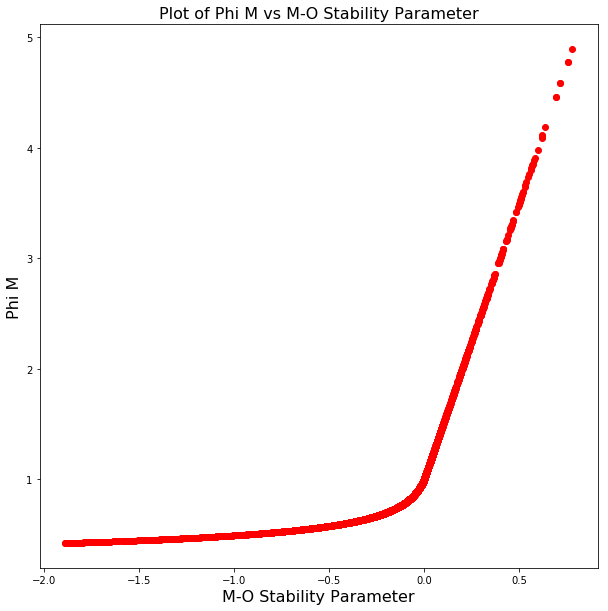

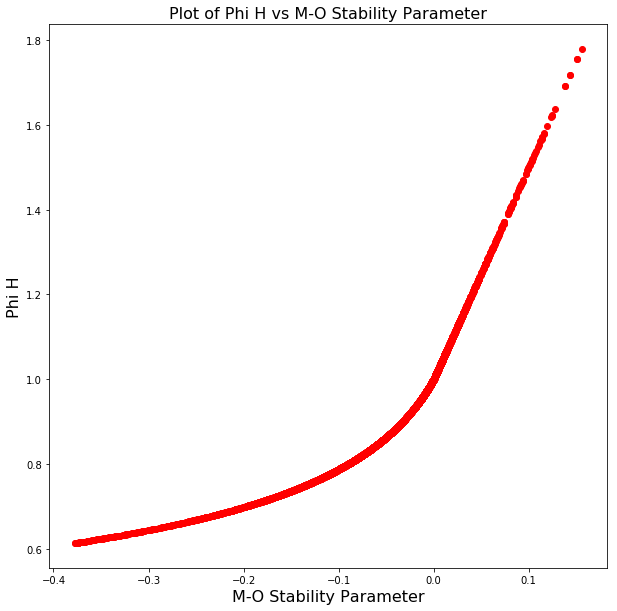

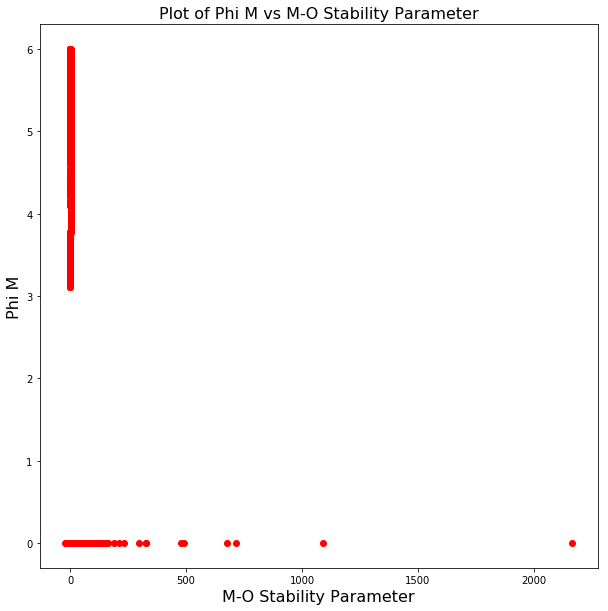

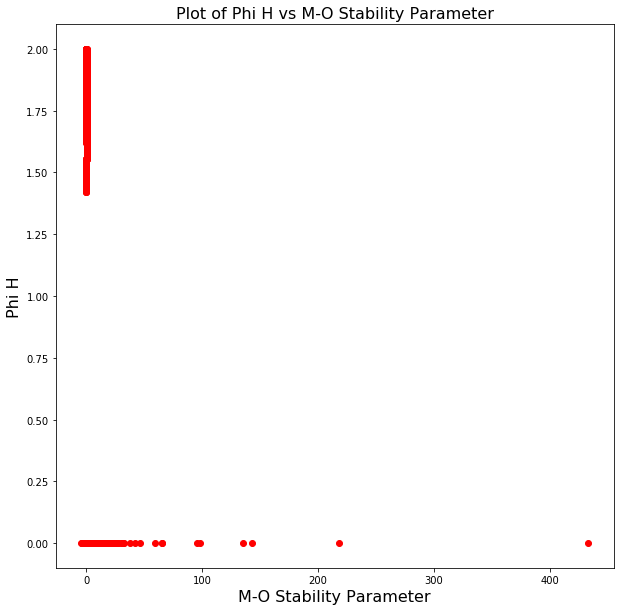

In [51]:
# Test the MO Similarity on the test dataset for the RF Predictions #
#--- Inputs
# Wind velocity at 10 m
u10 = datasetTest['10m U-Wind m/s']
v10 = datasetTest['10m V-Wind m/s']

# Skin temperature and temperature at 2 m
tsk = datasetTest['2m Temp K']
t2  = datasetTest['10m Temp K'] 
#
# Ground mixing ratio and mixing ratio at 2 m
qsfc, vap_pressure, sat_vap_pressure = mixing_ratio(datasetTest['2m Temp K']-273.15, 
                    datasetTest['2m RH %'], datasetTest['Barometric Pressure hpa'])
q2, vap_pressure, sat_vap_pressure    = mixing_ratio(datasetTest['2m Temp K']-273.15, 
                    datasetTest['2m RH %'], datasetTest['Barometric Pressure hpa'])
qsfc = qsfc / 1000
q2 = q2 /1000
#
# Surface pressure 
psfc = datasetTest['Barometric Pressure hpa']
#
# Momentum roughness length, heat flux roughness and reference level
z0  = .1
zt0 = z0
# Within the range of M-O Similarity Theory
phim=[]
zolm=[]
phih=[]
zolh=[]
t_2_out=[]
t_sk_out=[]
ustar_out=[]
tstar_out=[]
pred_ustar_out = []
pred_tstar_out = []
actual_ustar_out = []
actual_tstar_out = []

# Outside the range of M-O Similarity Theory
phimO=[]
zolmO=[]
phihO=[]
zolhO=[]
t_2_in=[]
t_sk_in=[]
ustar_in=[]
tstar_in=[]
pred_ustar_in = []
pred_tstar_in = []
actual_ustar_in = []
actual_tstar_in = []

#ustar,tstar,wthv0,zeta10,phim10,zeta2,phih2 = mo_similarity(u10,v10,tsk,t2,qsfc,q2,psfc,z0,zt0)
#
for i, val in enumerate(u10):
    ustar,tstar,wthv0,zeta10,phim10,zeta2,phih2 = mo_similarity(u10.iloc[i],v10.iloc[i],tsk.iloc[i],t2.iloc[i],qsfc.iloc[i],q2.iloc[i],psfc.iloc[i],z0,zt0)
    if ((zeta10 < -2.) | (zeta10 > 1.)):
        phimO.append(phim10)
        zolmO.append(zeta10)
        phihO.append(phih2)
        zolhO.append(zeta2)
        t_2_out.append(t2.iloc[i])
        t_sk_out.append(tsk.iloc[i])
        ustar_out.append(ustar)
        tstar_out.append(tstar)
        pred_ustar_out.append(predictionsF[i])
        pred_tstar_out.append(predictionsT[i])
        actual_ustar_out.append(test_labelsF.iloc[i])
        actual_tstar_out.append(test_labelsT.iloc[i])
        
    else:
        phim.append(phim10)
        zolm.append(zeta10)
        phih.append(phih2)
        zolh.append(zeta2)
        t_2_in.append(t2.iloc[i])
        t_sk_in.append(tsk.iloc[i])
        ustar_in.append(ustar)
        tstar_in.append(tstar)
        pred_ustar_in.append(predictionsF[i])
        pred_tstar_in.append(predictionsT[i])
        actual_ustar_in.append(test_labelsF.iloc[i])
        actual_tstar_in.append(test_labelsT.iloc[i])
    #
        #print("ustar = ",ustar,"  tstar = ",tstar," wthv0 = ",wthv0)
#
p=plt.plot(zolm,phim,'ro')
plt.title('Plot of Phi M vs M-O Stability Parameter', size = 16)
plt.xlabel('M-O Stability Parameter', size = 16)
plt.ylabel('Phi M', size = 16)
plt.show()
q=plt.plot(zolh,phih,'ro')
plt.title('Plot of Phi H vs M-O Stability Parameter', size = 16)
plt.xlabel('M-O Stability Parameter', size = 16)
plt.ylabel('Phi H', size = 16)
plt.show()
p=plt.plot(zolmO,phimO,'ro')
plt.title('Plot of Phi M vs M-O Stability Parameter', size = 16)
plt.xlabel('M-O Stability Parameter', size = 16)
plt.ylabel('Phi M', size = 16)
plt.show()
q=plt.plot(zolhO,phihO,'ro')
plt.title('Plot of Phi H vs M-O Stability Parameter', size = 16)
plt.xlabel('M-O Stability Parameter', size = 16)
plt.ylabel('Phi H', size = 16)
plt.show()

In [88]:
print(len(ustar_out))
print(len(tstar_out))
print(len(pred_ustar_out))
print(len(pred_tstar_out))
print(len(actual_ustar_out))
print(len(actual_tstar_out))
print(len(ustar_in))
print(len(tstar_in))
print(len(pred_ustar_in))
print(len(pred_tstar_in))
print(len(actual_ustar_in))
print(len(actual_tstar_in))
print(ustar_out[1:10])
print(actual_ustar_out[1:10])

10532
10532
10532
10532
10532
10532
4611
4611
4611
4611
4611
4611
[0.03474355855226015, 0.07817300674258533, 0.17371779276130073, 0.12160245493291051, 0.03474355855226015, 0.0694871171045203, 0.05211533782839021, 0.008685889638065037, 0.06948711710452028]
[0.12451466254375095, 0.09520140438769127, 0.10948920467807305, 0.1292622846719989, 0.0798468254408042, 0.05878771146120965, 0.07287292177784234, 0.06514624211044584, 0.05037808257238912]


In [52]:
print("The difference between M-O Friction Velocity and actuals is...",
      np.mean(np.absolute(np.array(ustar_in)-np.array(actual_ustar_in))))
print("The difference between ML Predicted Friction Velocity and actuals is...",
      np.mean(np.absolute(np.array(pred_ustar_in)-np.array(actual_ustar_in))))
print("The difference between M-O Temperature Scale and actuals is...",
      np.mean(np.absolute(np.array(tstar_in)-np.array(actual_tstar_in))))
print("The difference between ML Predicted Temperature Scale and actuals is...",
      np.mean(np.absolute(np.array(pred_tstar_in)-np.array(actual_tstar_in))))

The difference between M-O Friction Velocity and actuals is... 0.08921449484296917
The difference between ML Predicted Friction Velocity and actuals is... 0.05492821304238758
The difference between M-O Temperature Scale and actuals is... 0.22279256889180363
The difference between ML Predicted Temperature Scale and actuals is... 0.10493616427560382


The R value is... 0.9650774968924896


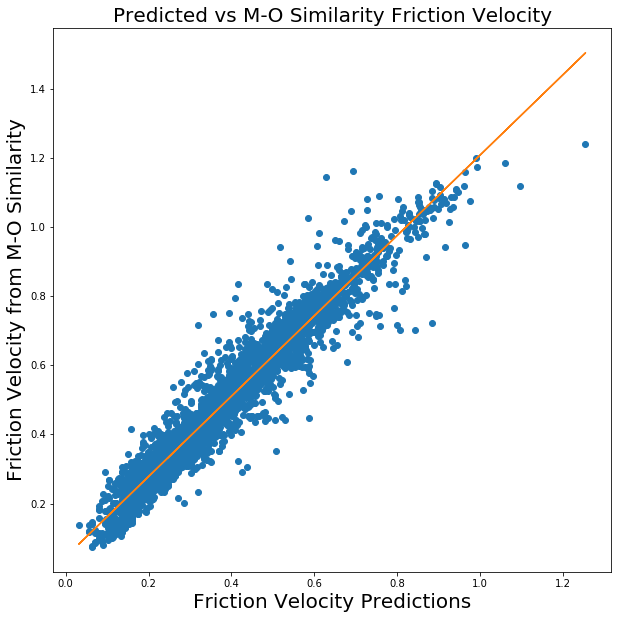

In [32]:
## Plots showing the 
plt.rcParams['figure.figsize'] = [10, 10]
from scipy import stats
x = np.array(ustar_in)
y = np.array(pred_ustar_in)
plt.scatter(x, y, 1, "k")
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
print("The R value is...",r_value)
plt.title('Predicted vs M-O Similarity Friction Velocity', size = 20)
plt.xlabel('Friction Velocity Predictions', size = 20)
plt.ylabel('Friction Velocity from M-O Similarity', size = 20)
plt.plot(x,y,'o', x, line)
plt.show()

The R value is... 0.9255969347475611


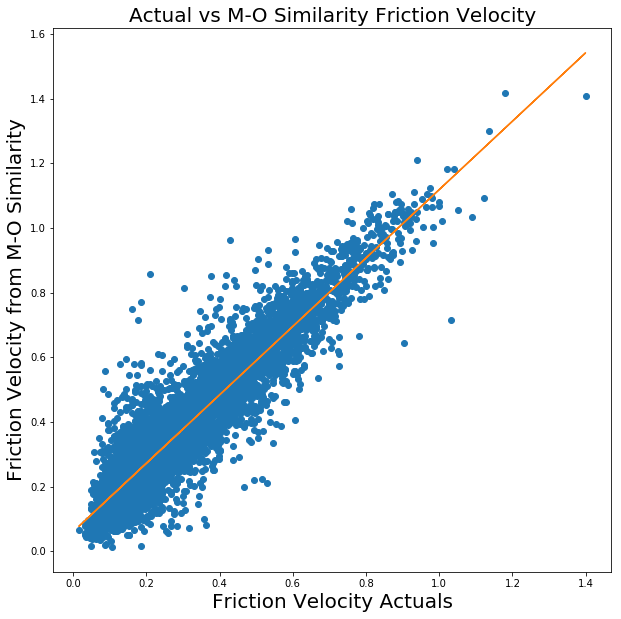

In [54]:
## Plots showing the 
plt.rcParams['figure.figsize'] = [10, 10]
from scipy import stats
x = np.array(ustar_in)
y = np.array(actual_ustar_in)
plt.scatter(x, y, 1, "k")
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
print("The R value is...",r_value)
plt.title('Actual vs M-O Similarity Friction Velocity', size = 20)
plt.xlabel('Friction Velocity Actuals', size = 20)
plt.ylabel('Friction Velocity from M-O Similarity', size = 20)
plt.plot(x,y,'o', x, line)
plt.show()

The R value is... 0.9315150788261973


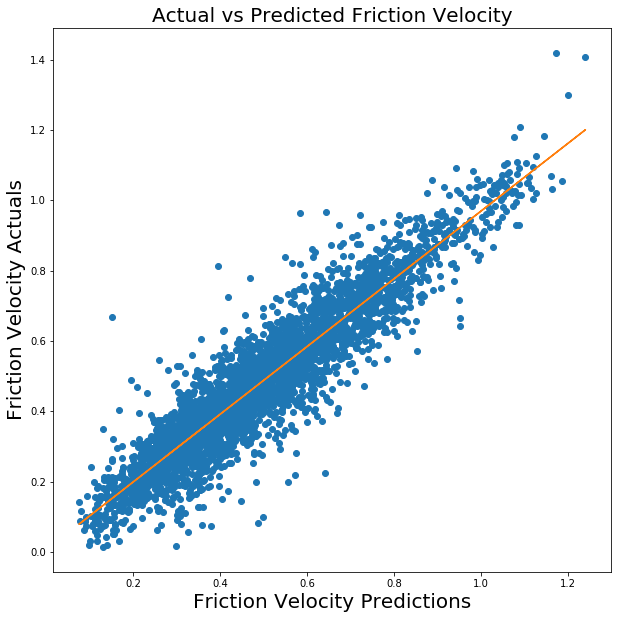

In [33]:
## Plots showing the 
plt.rcParams['figure.figsize'] = [10, 10]
from scipy import stats
x = np.array(pred_ustar_in)
y = np.array(actual_ustar_in)
plt.scatter(x, y, 1, "k")
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
print("The R value is...",r_value)
plt.title('Actual vs Predicted Friction Velocity', size = 20)
plt.xlabel('Friction Velocity Predictions', size = 20)
plt.ylabel('Friction Velocity Actuals', size = 20)
plt.plot(x,y,'o', x, line)
plt.show()

The difference between M-O Temperature Scale and actuals is... 0.5444224126578413
The difference between ML Predicted Temperature Scale and actuals is... 0.06646232244014806


The R value is... 0.6267066115809875


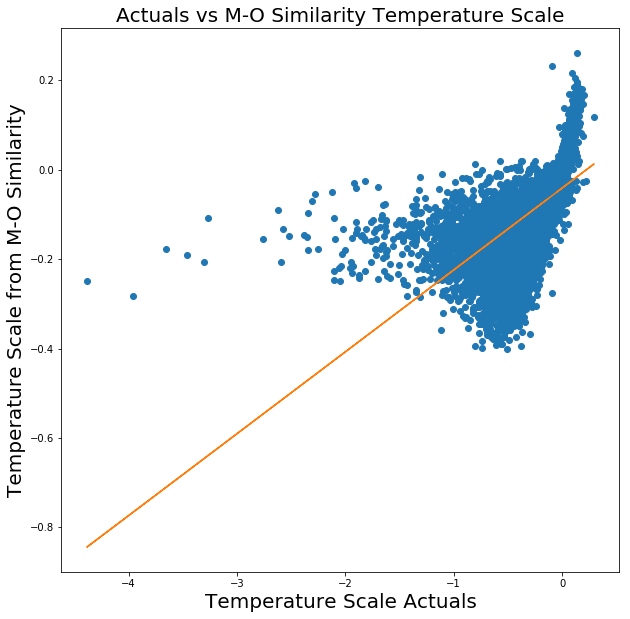

In [53]:
## Plots showing the 
plt.rcParams['figure.figsize'] = [10, 10]
from scipy import stats
x = np.array(actual_tstar_in)
y = np.array(tstar_in) 
y = y[x>-5] # Filter out a bad data point
x = x[x>-5] # Filter out a bad data point
plt.scatter(x, y, 1, "k")
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
print("The R value is...",r_value)
plt.title('Actuals vs M-O Similarity Temperature Scale', size = 20)
plt.xlabel('Temperature Scale Actuals', size = 20)
plt.ylabel('Temperature Scale from M-O Similarity', size = 20)
plt.plot(x,y,'o', x, line)
plt.show()

The R value is... 0.8936095848023661


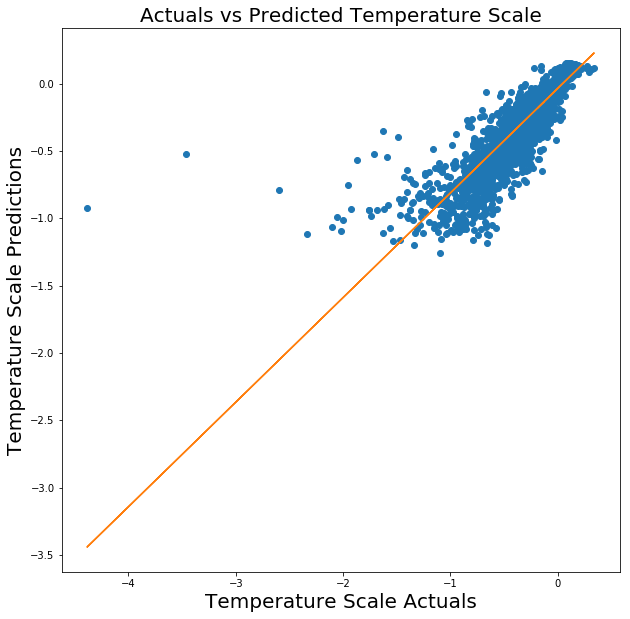

In [36]:
## Plots showing the 
plt.rcParams['figure.figsize'] = [10, 10]
from scipy import stats
x = np.array(actual_tstar_in)
y = np.array(pred_tstar_in) 
y = y[x>-5] # Filter out a bad data point
x = x[x>-5] # Filter out a bad data point
plt.scatter(x, y, 1, "k")
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
print("The R value is...",r_value)
plt.title('Actuals vs Predicted Temperature Scale', size = 20)
plt.xlabel('Temperature Scale Actuals', size = 20)
plt.ylabel('Temperature Scale Predictions', size = 20)
plt.plot(x,y,'o', x, line)
plt.show()

The R value is... -0.16704660535090113


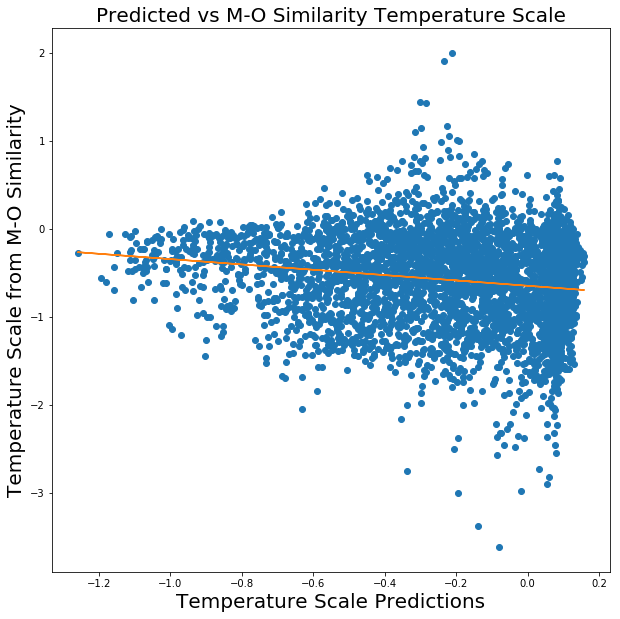

In [37]:
## Plots showing the 
plt.rcParams['figure.figsize'] = [10, 10]
from scipy import stats
x = np.array(pred_tstar_in) 
y = np.array(tstar_in)
plt.scatter(x, y, 1, "k")
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
print("The R value is...",r_value)
plt.title('Predicted vs M-O Similarity Temperature Scale', size = 20)
plt.xlabel('Temperature Scale Predictions', size = 20)
plt.ylabel('Temperature Scale from M-O Similarity', size = 20)
plt.plot(x,y,'o', x, line)
plt.show()

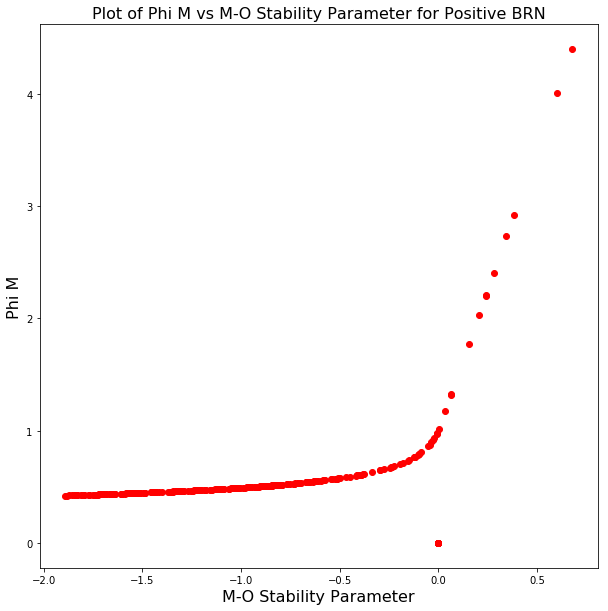

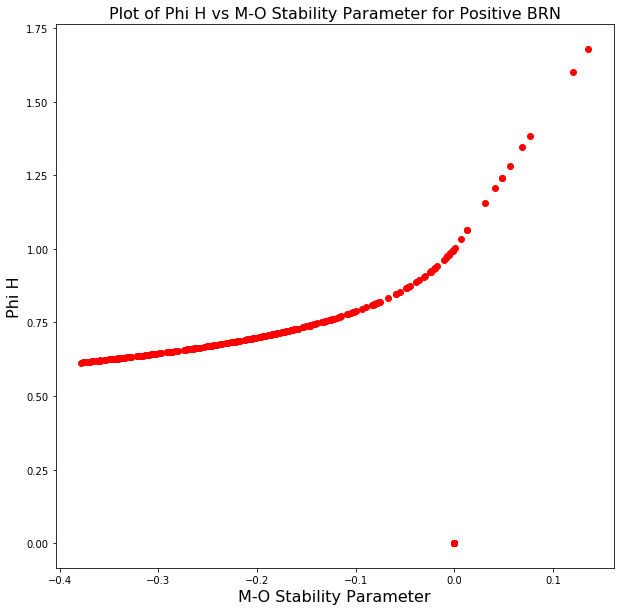

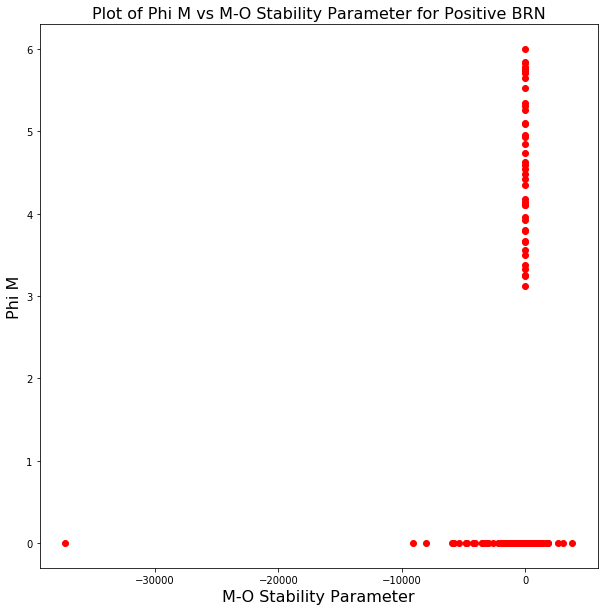

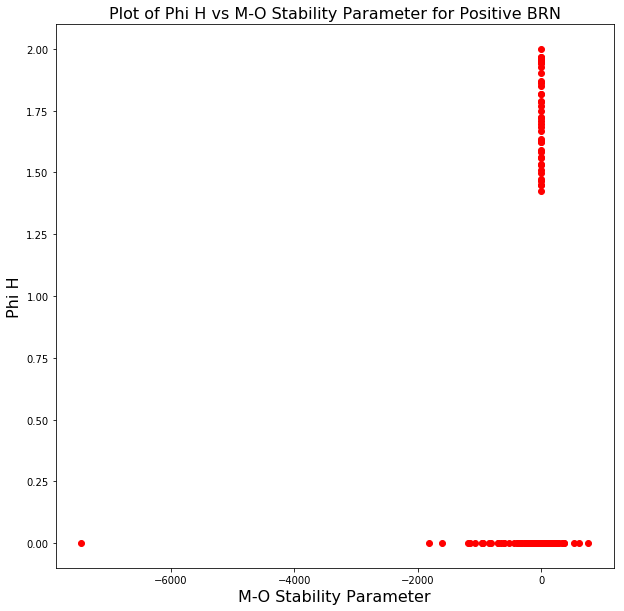

In [90]:
# Compare to M-O Similarity for the different BRN Regimes
# Test the MO Similarity on the test dataset for the RF Predictions #
#--- Inputs
# Wind velocity at 10 m
u10 = datasetTestP['10m U-Wind m/s']
v10 = datasetTestP['10m V-Wind m/s']

# Skin temperature and temperature at 2 m
tsk = datasetTestP['5cm Soil Temp C'] + 273.15
t2  = datasetTestP['2m Temp K'] 
#
# Ground mixing ratio and mixing ratio at 2 m
qsfc, vap_pressure, sat_vap_pressure = mixing_ratio(datasetTestP['2m Temp K']-273.15, 
                    datasetTestP['2m RH %'], datasetTestP['Barometric Pressure hpa'])
q2, vap_pressure, sat_vap_pressure    = mixing_ratio(datasetTest['2m Temp K']-273.15, 
                    datasetTestP['2m RH %'], datasetTestP['Barometric Pressure hpa'])
#
# Surface pressure 
psfc = datasetTestP['Barometric Pressure hpa']
#
# Momentum roughness length, heat flux roughness and reference level
z0  = 0.1
zt0 = z0
# Within the range of M-O Similarity Theory
phim=[]
zolm=[]
phih=[]
zolh=[]
t_2_out=[]
t_sk_out=[]
ustar_out=[]
tstar_out=[]
pred_ustar_out = []
pred_tstar_out = []
actual_ustar_out = []
actual_tstar_out = []

# Outside the range of M-O Similarity Theory
phimO=[]
zolmO=[]
phihO=[]
zolhO=[]
t_2_in=[]
t_sk_in=[]
ustar_in=[]
tstar_in=[]
pred_ustar_in = []
pred_tstar_in = []
actual_ustar_in = []
actual_tstar_in = []

#ustar,tstar,wthv0,zeta10,phim10,zeta2,phih2 = mo_similarity(u10,v10,tsk,t2,qsfc,q2,psfc,z0,zt0)
#
for i, val in enumerate(u10):
    ustar,tstar,wthv0,zeta10,phim10,zeta2,phih2 = mo_similarity(u10.iloc[i],v10.iloc[i],tsk.iloc[i],t2.iloc[i],qsfc.iloc[i],q2.iloc[i],psfc.iloc[i],z0,zt0)
    if ((zeta10 < -2.) | (zeta10 > 1.)):
        phimO.append(phim10)
        zolmO.append(zeta10)
        phihO.append(phih2)
        zolhO.append(zeta2)
        t_2_out.append(t2.iloc[i])
        t_sk_out.append(tsk.iloc[i])
        ustar_out.append(ustar)
        tstar_out.append(tstar)
        pred_ustar_out.append(predictionsFP[i])
        pred_tstar_out.append(predictionsTP[i])
        actual_ustar_out.append(test_labelsFP.iloc[i])
        actual_tstar_out.append(test_labelsTP.iloc[i])
        
    else:
        phim.append(phim10)
        zolm.append(zeta10)
        phih.append(phih2)
        zolh.append(zeta2)
        t_2_in.append(t2.iloc[i])
        t_sk_in.append(tsk.iloc[i])
        ustar_in.append(ustar)
        tstar_in.append(tstar)
        pred_ustar_in.append(predictionsFP[i])
        pred_tstar_in.append(predictionsTP[i])
        actual_ustar_in.append(test_labelsFP.iloc[i])
        actual_tstar_in.append(test_labelsTP.iloc[i])
    #
        #print("ustar = ",ustar,"  tstar = ",tstar," wthv0 = ",wthv0)
#
p=plt.plot(zolm,phim,'ro')
plt.title('Plot of Phi M vs M-O Stability Parameter for Positive BRN', size = 16)
plt.xlabel('M-O Stability Parameter', size = 16)
plt.ylabel('Phi M', size = 16)
plt.show()
q=plt.plot(zolh,phih,'ro')
plt.title('Plot of Phi H vs M-O Stability Parameter for Positive BRN', size = 16)
plt.xlabel('M-O Stability Parameter', size = 16)
plt.ylabel('Phi H', size = 16)
plt.show()
p=plt.plot(zolmO,phimO,'ro')
plt.title('Plot of Phi M vs M-O Stability Parameter for Positive BRN', size = 16)
plt.xlabel('M-O Stability Parameter', size = 16)
plt.ylabel('Phi M', size = 16)
plt.show()
q=plt.plot(zolhO,phihO,'ro')
plt.title('Plot of Phi H vs M-O Stability Parameter for Positive BRN', size = 16)
plt.xlabel('M-O Stability Parameter', size = 16)
plt.ylabel('Phi H', size = 16)
plt.show()

In [91]:
print("The difference between M-O Friction Velocity and actuals for positive BRN is...",
      np.mean(np.absolute(np.array(ustar_in)-np.array(actual_ustar_in))))
print("The difference between ML Predicted Friction Velocity and actuals for positive BRN is...",
      np.mean(np.absolute(np.array(pred_ustar_in)-np.array(actual_ustar_in))))

print("The difference between M-O Temperature Scale and actuals for positive BRN is...",
      np.nanmean(np.absolute(np.array(tstar_in)-np.array(actual_tstar_in))))
print("The difference between ML Predicted Temperature Scale and actuals for positive BRN is...",
      np.mean(np.absolute(np.array(pred_tstar_in)-np.array(actual_tstar_in))))

The difference between M-O Friction Velocity and actuals for positive BRN is... 0.06740588049526679
The difference between ML Predicted Friction Velocity and actuals for positive BRN is... 0.05867766667101091
The difference between M-O Temperature Scale and actuals for positive BRN is... 2.2892400027312596
The difference between ML Predicted Temperature Scale and actuals for positive BRN is... 0.04463794758000706


(array([  2.,   0.,   3.,  20.,  33., 148., 355., 536., 742., 608., 312.,
         78.,  19.,   4.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-3.65484855, -3.23994601, -2.82504347, -2.41014093, -1.99523838,
        -1.58033584, -1.1654333 , -0.75053076, -0.33562822,  0.07927432,
         0.49417687,  0.90907941,  1.32398195,  1.73888449,  2.15378703,
         2.56868958,  2.98359212,  3.39849466,  3.8133972 ,  4.22829974,
         4.64320229,  5.05810483,  5.47300737,  5.88790991,  6.30281245,
         6.71771499,  7.13261754,  7.54752008,  7.96242262,  8.37732516,
         8.7922277 ,  9.20713025,  9.62203279, 10.03693533, 10.45183787,
        10.86674041, 11.28164296, 11.6965455 , 12.11144804, 12.52635058,
        12.94125312, 13.35615567, 13.77105821, 14.18596075, 14.60086329,
 

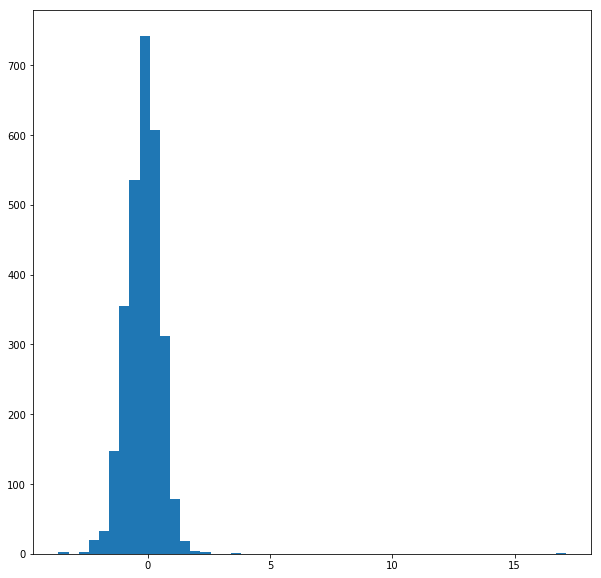

In [47]:
plt.hist(np.array(tstar_in)-np.array(actual_tstar_in),bins=50)

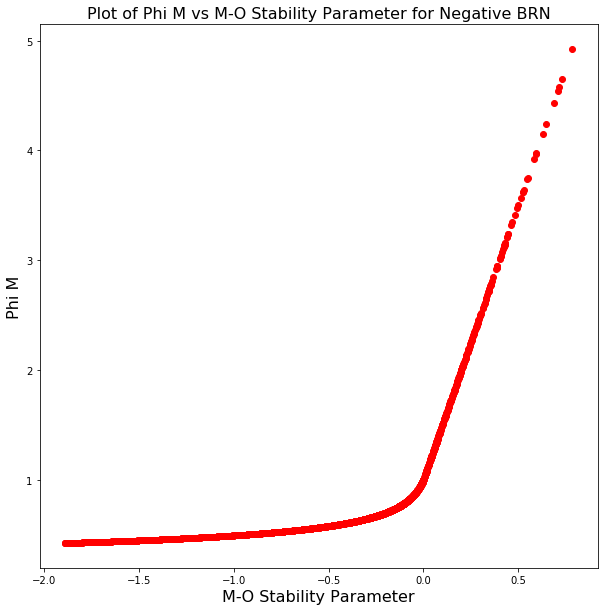

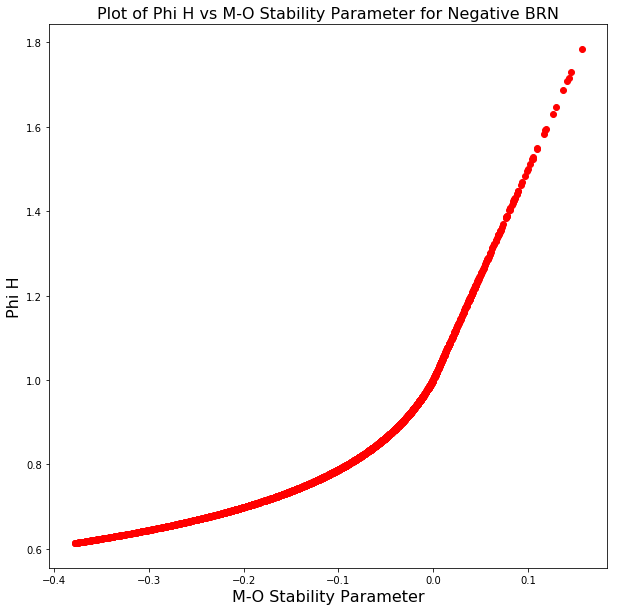

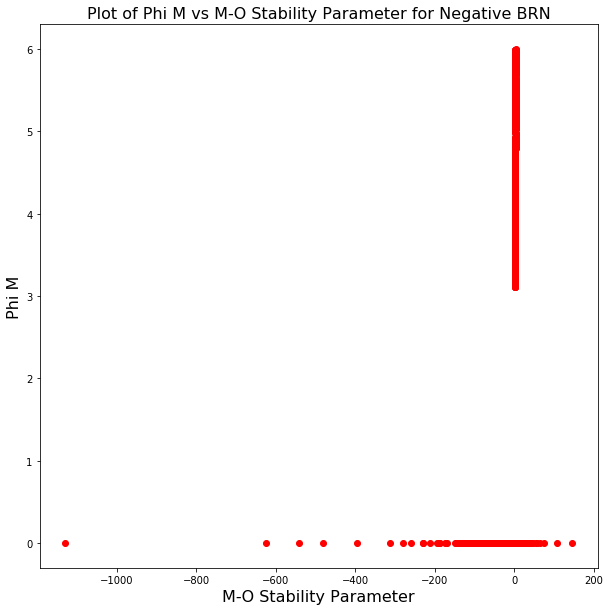

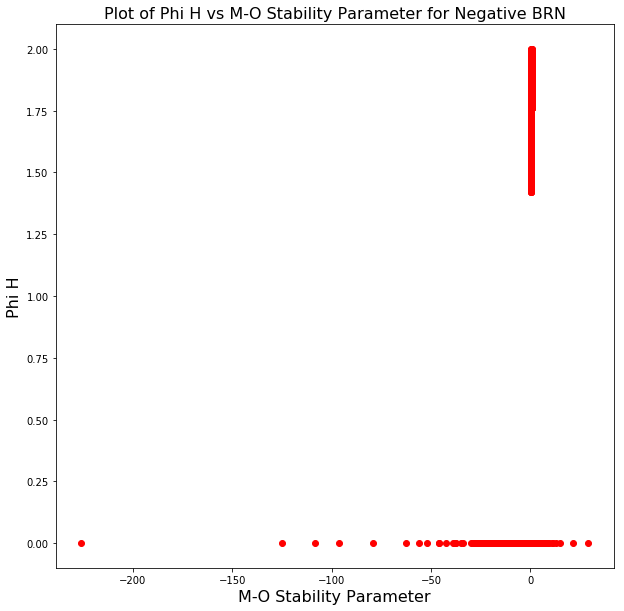

In [92]:
# Compare to M-O Similarity for the different BRN Regimes
# Test the MO Similarity on the test dataset for the RF Predictions #
#--- Inputs
# Wind velocity at 10 m
u10 = datasetTestN['10m U-Wind m/s']
v10 = datasetTestN['10m V-Wind m/s']

# Skin temperature and temperature at 2 m
tsk = datasetTestN['5cm Soil Temp C'] + 273.15
t2  = datasetTestN['2m Temp K'] 
#
# Ground mixing ratio and mixing ratio at 2 m
qsfc, vap_pressure, sat_vap_pressure = mixing_ratio(datasetTestN['2m Temp K']-273.15, 
                    datasetTestN['2m RH %'], datasetTestN['Barometric Pressure hpa'])
q2, vap_pressure, sat_vap_pressure    = mixing_ratio(datasetTestN['2m Temp K']-273.15, 
                    datasetTestN['2m RH %'], datasetTestN['Barometric Pressure hpa'])
#
# Surface pressure 
psfc = datasetTestN['Barometric Pressure hpa']
#
# Momentum roughness length, heat flux roughness and reference level
z0  = 0.1
zt0 = z0
# Within the range of M-O Similarity Theory
phim=[]
zolm=[]
phih=[]
zolh=[]
t_2_out=[]
t_sk_out=[]
ustar_out=[]
tstar_out=[]
pred_ustar_out = []
pred_tstar_out = []
actual_ustar_out = []
actual_tstar_out = []

# Outside the range of M-O Similarity Theory
phimO=[]
zolmO=[]
phihO=[]
zolhO=[]
t_2_in=[]
t_sk_in=[]
ustar_in=[]
tstar_in=[]
pred_ustar_in = []
pred_tstar_in = []
actual_ustar_in = []
actual_tstar_in = []

#ustar,tstar,wthv0,zeta10,phim10,zeta2,phih2 = mo_similarity(u10,v10,tsk,t2,qsfc,q2,psfc,z0,zt0)
#
for i, val in enumerate(u10):
    ustar,tstar,wthv0,zeta10,phim10,zeta2,phih2 = mo_similarity(u10.iloc[i],v10.iloc[i],tsk.iloc[i],t2.iloc[i],qsfc.iloc[i],q2.iloc[i],psfc.iloc[i],z0,zt0)
    if ((zeta10 < -2.) | (zeta10 > 1.)):
        phimO.append(phim10)
        zolmO.append(zeta10)
        phihO.append(phih2)
        zolhO.append(zeta2)
        t_2_out.append(t2.iloc[i])
        t_sk_out.append(tsk.iloc[i])
        ustar_out.append(ustar)
        tstar_out.append(tstar)
        pred_ustar_out.append(predictionsFN[i])
        pred_tstar_out.append(predictionsTN[i])
        actual_ustar_out.append(test_labelsFN.iloc[i])
        actual_tstar_out.append(test_labelsTN.iloc[i])
        
    else:
        phim.append(phim10)
        zolm.append(zeta10)
        phih.append(phih2)
        zolh.append(zeta2)
        t_2_in.append(t2.iloc[i])
        t_sk_in.append(tsk.iloc[i])
        ustar_in.append(ustar)
        tstar_in.append(tstar)
        pred_ustar_in.append(predictionsFN[i])
        pred_tstar_in.append(predictionsTN[i])
        actual_ustar_in.append(test_labelsFN.iloc[i])
        actual_tstar_in.append(test_labelsTN.iloc[i])
    #
        #print("ustar = ",ustar,"  tstar = ",tstar," wthv0 = ",wthv0)
#
p=plt.plot(zolm,phim,'ro')
plt.title('Plot of Phi M vs M-O Stability Parameter for Negative BRN', size = 16)
plt.xlabel('M-O Stability Parameter', size = 16)
plt.ylabel('Phi M', size = 16)
plt.show()
q=plt.plot(zolh,phih,'ro')
plt.title('Plot of Phi H vs M-O Stability Parameter for Negative BRN', size = 16)
plt.xlabel('M-O Stability Parameter', size = 16)
plt.ylabel('Phi H', size = 16)
plt.show()
p=plt.plot(zolmO,phimO,'ro')
plt.title('Plot of Phi M vs M-O Stability Parameter for Negative BRN', size = 16)
plt.xlabel('M-O Stability Parameter', size = 16)
plt.ylabel('Phi M', size = 16)
plt.show()
q=plt.plot(zolhO,phihO,'ro')
plt.title('Plot of Phi H vs M-O Stability Parameter for Negative BRN', size = 16)
plt.xlabel('M-O Stability Parameter', size = 16)
plt.ylabel('Phi H', size = 16)
plt.show()

In [93]:
print("The difference between M-O Friction Velocity and actuals for negative BRN is...",
      np.mean(np.absolute(np.array(ustar_in)-np.array(actual_ustar_in))))
print("The difference between ML Predicted Friction Velocity and actuals for negative BRN is...",
      np.mean(np.absolute(np.array(pred_ustar_in)-np.array(actual_ustar_in))))

print("The difference between M-O Temperature Scale and actuals for negative BRN is...",
      np.mean(np.absolute(np.array(tstar_in)-np.array(actual_tstar_in))))
print("The difference between ML Predicted Temperature Scale and actuals for negative BRN is...",
      np.mean(np.absolute(np.array(pred_tstar_in)-np.array(actual_tstar_in))))

The difference between M-O Friction Velocity and actuals for negative BRN is... 0.1257456928795947
The difference between ML Predicted Friction Velocity and actuals for negative BRN is... 0.06882398831091918
The difference between M-O Temperature Scale and actuals for negative BRN is... 0.4836004949902497
The difference between ML Predicted Temperature Scale and actuals for negative BRN is... 0.09752631283043205


(array([  2.,   0.,   3.,  20.,  33., 148., 355., 536., 742., 608., 312.,
         78.,  19.,   4.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-3.65484855, -3.23994601, -2.82504347, -2.41014093, -1.99523838,
        -1.58033584, -1.1654333 , -0.75053076, -0.33562822,  0.07927432,
         0.49417687,  0.90907941,  1.32398195,  1.73888449,  2.15378703,
         2.56868958,  2.98359212,  3.39849466,  3.8133972 ,  4.22829974,
         4.64320229,  5.05810483,  5.47300737,  5.88790991,  6.30281245,
         6.71771499,  7.13261754,  7.54752008,  7.96242262,  8.37732516,
         8.7922277 ,  9.20713025,  9.62203279, 10.03693533, 10.45183787,
        10.86674041, 11.28164296, 11.6965455 , 12.11144804, 12.52635058,
        12.94125312, 13.35615567, 13.77105821, 14.18596075, 14.60086329,
 

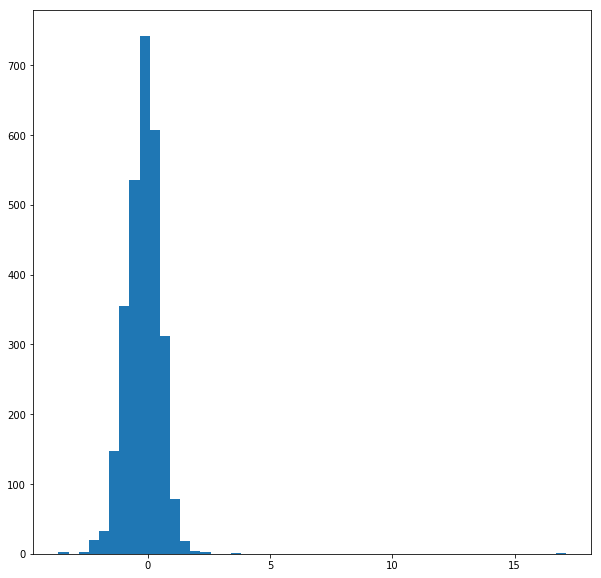

In [43]:
plt.hist((np.array(tstar_in)-np.array(actual_tstar_in)),bins=50)

In [75]:
# Test adding in Bulk Richardson Number as a Predictor
dataset = pd.DataFrame()
# Create datasets for training and testing.  
# Predictors to use:
dataset['2m potential temperature k'] = resultTrain['2m potential temperature k']
dataset['10m potential temperature k'] = resultTrain['10m potential temperature k']
dataset['15m potential temperature k'] = resultTrain['15m potential temperature k']
dataset['45m potential temperature k'] = resultTrain['45m potential temperature k']
dataset['2m U-Wind m/s'] = resultTrain['2m U-Wind m/s']
dataset['2m V-Wind m/s'] = resultTrain['2m V-Wind m/s']
dataset['10m U-Wind m/s'] = resultTrain['2m U-Wind m/s']
dataset['10m V-Wind m/s'] = resultTrain['2m V-Wind m/s']
dataset['15m U-Wind m/s'] = resultTrain['2m U-Wind m/s']
dataset['15m V-Wind m/s'] = resultTrain['2m V-Wind m/s']
dataset['45m U-Wind m/s'] = resultTrain['2m U-Wind m/s']
dataset['45m V-Wind m/s'] = resultTrain['2m V-Wind m/s']
dataset['2m RH %'] = resultTrain['2m RH %']
dataset['Solar Rad w/m^2'] = resultTrain['Solar Rad w/m^2']
dataset['Barometric Pressure hpa'] = resultTrain['Barometric Pressure hpa']
dataset['solar zenith angle'] = resultTrain['solar_zenith_angle']
dataset['5cm Water Content'] = resultTrain['5cm Water Content']
dataset['5cm Soil Temp C'] = resultTrain['5cm Soil Temp C']
dataset['10m bulk richardson number'] = resultTrain['10m bulk richardson number']
dataset['2m Temp K'] = resultTrain['2m Temp K']
dataset['10m Temp K'] = resultTrain['10m Temp K']

datasetTest = pd.DataFrame()
# Create datasets for training and testing.  
# Predictors to use:
datasetTest['2m potential temperature k'] = resultTest['2m potential temperature k']
datasetTest['10m potential temperature k'] = resultTest['10m potential temperature k']
datasetTest['15m potential temperature k'] = resultTest['15m potential temperature k']
datasetTest['45m potential temperature k'] = resultTest['45m potential temperature k']
datasetTest['2m U-Wind m/s'] = resultTest['2m U-Wind m/s']
datasetTest['2m V-Wind m/s'] = resultTest['2m V-Wind m/s']
datasetTest['10m U-Wind m/s'] = resultTest['2m U-Wind m/s']
datasetTest['10m V-Wind m/s'] = resultTest['2m V-Wind m/s']
datasetTest['15m U-Wind m/s'] = resultTest['2m U-Wind m/s']
datasetTest['15m V-Wind m/s'] = resultTest['2m V-Wind m/s']
datasetTest['45m U-Wind m/s'] = resultTest['2m U-Wind m/s']
datasetTest['45m V-Wind m/s'] = resultTest['2m V-Wind m/s']
datasetTest['2m RH %'] = resultTest['2m RH %']
datasetTest['Solar Rad w/m^2'] = resultTest['Solar Rad w/m^2']
datasetTest['Barometric Pressure hpa'] = resultTest['Barometric Pressure hpa']
datasetTest['solar zenith angle'] = resultTest['solar_zenith_angle']
datasetTest['5cm Water Content'] = resultTest['5cm Water Content']
datasetTest['5cm Soil Temp C'] = resultTest['5cm Soil Temp C']
datasetTest['10m bulk richardson number'] = resultTest['10m bulk richardson number']
datasetTest['2m Temp K'] = resultTest['2m Temp K']
datasetTest['10m Temp K'] = resultTest['10m Temp K']

featuresM = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C',
            '10m bulk richardson number']
featuresB = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C',
            '10m bulk richardson number']
featuresF = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C',
             '10m bulk richardson number']

MoistureScaleTrain = resultTrain['moisture scale']
TemperatureScaleTrain = resultTrain['temperature scale']
FrictionVelocityTrain = resultTrain['friction velocity']

MoistureScaleTest = resultTest['moisture scale']
TemperatureScaleTest = resultTest['temperature scale']
FrictionVelocityTest = resultTest['friction velocity']

# Put in nomenclature so that either yearly or random split can be used
train_featuresM = dataset
train_labelsM = MoistureScaleTrain
train_featuresF = dataset
train_labelsF = FrictionVelocityTrain
train_featuresT = dataset
train_labelsT = TemperatureScaleTrain

test_featuresM = datasetTest
test_labelsM = MoistureScaleTest
test_featuresF = datasetTest
test_labelsF = FrictionVelocityTest
test_featuresT = datasetTest
test_labelsT = TemperatureScaleTest

######### Configure and train the Random Forest ##############
# Import the Random Forest Model
# Instantiate model 
rfM = RandomForestRegressor(n_estimators= 1000, random_state=2, n_jobs=4,criterion='mse',min_samples_split=4,min_samples_leaf=2)
rfT = RandomForestRegressor(n_estimators= 1000, random_state=2, n_jobs=4,criterion='mse',min_samples_split=4,min_samples_leaf=2)
rfF = RandomForestRegressor(n_estimators= 1000, random_state=2, n_jobs=4,criterion='mse',min_samples_split=4,min_samples_leaf=2)
# Train the model on training data
rfM.fit(train_featuresM.iloc[:,0:19], train_labelsM);
rfF.fit(train_featuresF.iloc[:,0:19], train_labelsF);
rfT.fit(train_featuresT.iloc[:,0:19], train_labelsT);

# Use the forest's predict method on the test data
predictionsM = rfM.predict(test_featuresM.iloc[:,0:19])
predictionsT = rfT.predict(test_featuresT.iloc[:,0:19])
predictionsF = rfF.predict(test_featuresF.iloc[:,0:19])

######### Compute Errors on Test Data #############
# Calculate the absolute errors
errorsM = abs(predictionsM - test_labelsM)
errorsT = abs(predictionsT - test_labelsT)
errorsF = abs(predictionsF - test_labelsF)
# Print out the mean absolute error (mae)
print('Mean Absolute Error for predicting Moisture Scale:', round(np.mean(errorsM), 4))
print('Mean Absolute Error for predicting Temperature Scale:', round(np.mean(errorsT), 4))
print('Mean Absolute Error for predicting Friction Velocity:', round(np.mean(errorsF), 4))
print('Moisture Scale Mean: ',np.mean(MoistureScaleTest))
print('Moisture Scale Standard Deviation: ',np.std(MoistureScaleTest))
print('Temperature Scale Mean: ',np.mean(TemperatureScaleTest))
print('Temperature Scale Standard Deviation: ',np.std(TemperatureScaleTest))
print('Friction Velocity Mean: ',np.mean(FrictionVelocityTest))
print('Friction Velocity Standard Deviation: ',np.std(FrictionVelocityTest))

# Feature selection
importancesM = list(rfM.feature_importances_)
feature_listM = featuresM
feature_importancesM = [(featuresM,round(importancesM,2)) for featuresM, importancesM in zip(feature_listM,importancesM)]
feature_importancesM = sorted(feature_importancesM,key = lambda x: x[1],reverse=True)
print("Features importances for predicting moisture scale")
[print('Variable:{:20} Importance: {}'.format(*pair)) for pair in feature_importancesM];

# Feature selection
importancesT = list(rfT.feature_importances_)
feature_listT = featuresB
feature_importancesT = [(featuresT,round(importancesT,2)) for featuresT, importancesT in zip(feature_listT,importancesT)]
feature_importancesT = sorted(feature_importancesT,key = lambda x: x[1],reverse=True)
print("Features importances for predicting temperature scale")
[print('Variable:{:20} Importance: {}'.format(*pair)) for pair in feature_importancesT];

# Feature selection
importancesF = list(rfF.feature_importances_)
featuresF = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','solar zenith angle','5cm Water Content','5cm Soil Temp C','10m bulk richardson number']
feature_listF = featuresF
feature_importancesF = [(featuresF,round(importancesF,2)) for featuresF, importancesF in zip(feature_listF,importancesF)]
feature_importancesF = sorted(feature_importancesF,key = lambda x: x[1],reverse=True)
print("Features importances for predicting friction velocity")
[print('Variable:{:20} Importance: {}'.format(*pair)) for pair in feature_importancesF];

Mean Absolute Error for predicting Moisture Scale: 0.0237
Mean Absolute Error for predicting Temperature Scale: 0.0795
Mean Absolute Error for predicting Friction Velocity: 0.0495
Moisture Scale Mean:  0.024799827182640313
Moisture Scale Standard Deviation:  0.06228143833030081
Temperature Scale Mean:  -0.16748345962055036
Temperature Scale Standard Deviation:  0.39779457382886946
Friction Velocity Mean:  0.29261491154702074
Friction Velocity Standard Deviation:  0.21440500863554918
Features importances for predicting moisture scale
Variable:Solar Rad w/m^2      Importance: 0.31
Variable:10m bulk richardson number Importance: 0.18
Variable:5cm Water Content    Importance: 0.17
Variable:5cm Soil Temp C      Importance: 0.1
Variable:2m RH %              Importance: 0.05
Variable:Barometric Pressure hpa Importance: 0.04
Variable:2m potential temperature k Importance: 0.03
Variable:solar zenith angle   Importance: 0.03
Variable:10m potential temperature k Importance: 0.01
Variable:15m pote

In [78]:
from math import log, atan, sqrt
import numpy as np
from numba import jit
@jit(nopython=True)
def mo_similarity(u10, v10, tsk, t2, qsfc, q2, psfc, z0=0.1, zt0=2, z10=10.0, z2=10.0):
    """
    Calculate flux information based on Monin-Obukhov similarity theory.
    Args:
        u10: 10 m level zonal wind speed [m/s]
        v10: 10 m level meridional wind speed [m/s]
        tsk: surface skin temperature [K]
        t2: 2 m level temperature [K]
        qsfc: ground mixing ratio
        q2: 2 m level mixing ratio
        psfc: surface pressure
        z0: momentum roughness length
        zt0: heat flux roughness length
        z10: Height of "10 m" layer
        z2: Height of "2 m" layer
    Returns:
        ustar: friction velocity
        tstar: temperature scale
        wthv0: -ustar * tstar
        zeta10: z/L for a z of 10 m. Used for momentum flux
        phim10: momentum universal function at 10 m
        zeta2: z/L for a z of 2 m.
        phih2: sensible heat flux universal function at 2 m.
    """
    if z0 > 0:
        z10oz0 = z10 / z0
        z2oz0 = z2 / z0
        z2ozt0 = z2 / zt0
    else:
        raise ValueError("z0 must be greater than 0")
    # else:
    #    sys.exit("Surface roughnes, z0, must be greter than 0.!")
    #
    # Gravitational acceleration
    g = 9.81
    #
    # Gas constant over spcific heat capacity at constant pressure
    r = 287.058
    cp = 1005.
    rocp = r / cp
    #
    # Reference pressure and temperature
    p0 = 1000.
    t0 = 300.
    #
    # Set M-O parameters based on Dyer 1974 paper
    karman = 0.4
    beta = 5.0
    gamma = 16.0
    #
    # Air density
    rho = psfc / (r * t2)
    #
    # Potential temperature speed at level 1
    th2 = t2 * (p0 / psfc) ** rocp
    th0 = tsk * (p0 / psfc) ** rocp
    #
    # Virtual potential temperature
    thv2 = th2 * (1. + 0.61 * q2)
    thv0 = th0 * (1. + 0.61 * qsfc)
    #
    # Small number
    epsilon = 1.e-6
    #
    # Initial values of drag coefficients - neutrally stratified case
    cd = karman ** 2 / ((log(z10oz0)) ** 2)
    ch = karman ** 2 / ((log(z2ozt0)) ** 2)
    cq = karman ** 2 / ((log(z2ozt0)) ** 2)
    #
    # Initial values of surface friction velocity, temperature scale, and
    # heat flux
    wind_speed = sqrt(u10 * u10 + v10 * v10)
    if wind_speed < 0.1:
        wind_speed = 0.1
        u10 = 0.1
    tauxz = cd * wind_speed * u10
    tauyz = cd * wind_speed * v10
    ustar = (tauxz ** 2 + tauyz ** 2) ** 0.25

    tstar = -ch / ustar * wind_speed * (th0 - th2)
    wthv0 = -ustar * tstar
    #
    # Set stopping criterion
    diff = 1.
    #
    # Set stability functions
    psim10 = 0.
    psim2 = 0.
    psih2 = 0.
    psiq2 = 0.
    phim10 = 0.
    phih2 = 0
    #
    zeta10 = 0.
    zeta2 = 0.
    count = 0
    while diff > epsilon and count < 100:
        #
        # Surface friction velocity and temperature scale
        tauxz = cd * wind_speed * u10
        tauyz = cd * wind_speed * v10
        ustar = (tauxz ** 2 + tauyz ** 2) ** 0.25
        if ustar < 0.01:
            ustar = 0.01
        wspd2 = ustar / karman * (log(z2oz0) - psim2)
        tstar = -ch / ustar * wind_speed * (thv0 - thv2)
        wthv0 = -ustar * tstar
        #
        # Compute drag coefficients
        cdold = cd
        chold = ch
        cqold = cq
        #
        # Neutrally stratified case
        if wthv0 == 0:
            zeta10 = 0.
            zeta2 = 0.
            psim10 = 0.
            psim2 = 0.
            psih2 = 0.
            psiq2 = 0.
            phim10 = 1.
            phih2 = 1.
            cd = karman ** 2 / ((log(z10oz0)) ** 2)
            ch = karman ** 2 / ((log(z2ozt0)) ** 2)
            cq = karman ** 2 / ((log(z2ozt0)) ** 2)
        elif abs(wthv0) > 0:
            #
            # Obukhov length scale
            olength = -ustar ** 3 / (karman * g / t0 * wthv0)
            if abs(olength) < 10 and olength > 0:
                olength = z10
            elif abs(olength) < 10 and olength < 0:
                olength = -z10
            #
            # Free convection
            # if (olength == 0.):
            #    sys.exit("Free convection!")
            #
            # Monin-Obukhov stability parameter
            zeta10 = z10 / olength
            zeta2 = z2 / olength
            #
            # Convective case
            if (zeta2 < -epsilon) & (zeta10 >= -2.):
                xi10 = 1. / ((1. - gamma * zeta10) ** 0.25)
                xi2 = 1. / ((1. - gamma * zeta2) ** 0.25)
                psim10 = log(0.5 * (1.0 + xi10 ** 2) * (0.5 * (1.0 + xi10)) ** 2) \
                    - 2. * atan(xi10) + 0.5 * np.pi
                psim2 = log(0.5 * (1.0 + xi2 ** 2) * (0.5 * (1.0 + xi2)) ** 2) \
                    - 2. * atan(xi2) + 0.5 * np.pi
                psih2 = 2.0 * log(0.5 * (1.0 + xi2 ** 2))
                psiq2 = 2.0 * log(0.5 * (1.0 + xi2 ** 2))
                phim10 = 1. / ((1. - gamma * zeta10) ** 0.25)
                phih2 = 1. / ((1. - gamma * zeta2) ** 0.25)
            #
            # Stably stratified case
            elif (zeta2 > epsilon) & (zeta2 <= 1.):
                psim10 = - beta * zeta10
                psim2 = - beta * zeta2
                psih2 = - beta * zeta2
                psiq2 = - beta * zeta2
                phim10 = (1. + beta * zeta10)
                phih2 = (1. + beta * zeta2)
            #
            # Neutrally stratified case
            elif (zeta2 <= epsilon) & (zeta2 >= -epsilon):
                psim10 = 0.
                psim2 = 0.
                psih2 = 0.
                psiq2 = 0.
                phim10 = 1.
                phih2 = 1.
            #
            cd = karman ** 2 / ((log(z10oz0) - psim10) ** 2)
            ch = karman ** 2 / ((log(z2ozt0) - psim2) * (log(z2ozt0) - psih2))
            cq = karman ** 2 / ((log(z2ozt0) - psim2) * (log(z2ozt0) - psiq2))
        #
        diff = abs(cd - cdold) + abs(ch - chold) + abs(cq - cqold)
        count += 1
    #
    return ustar, tstar, wthv0, zeta10, phim10, zeta2, phih2

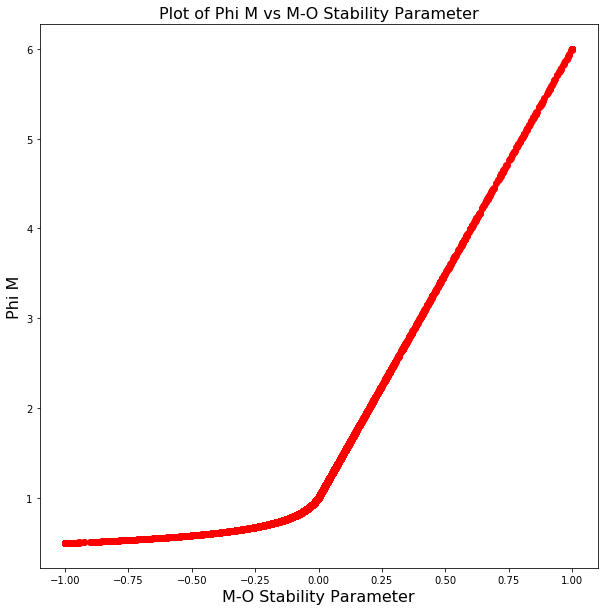

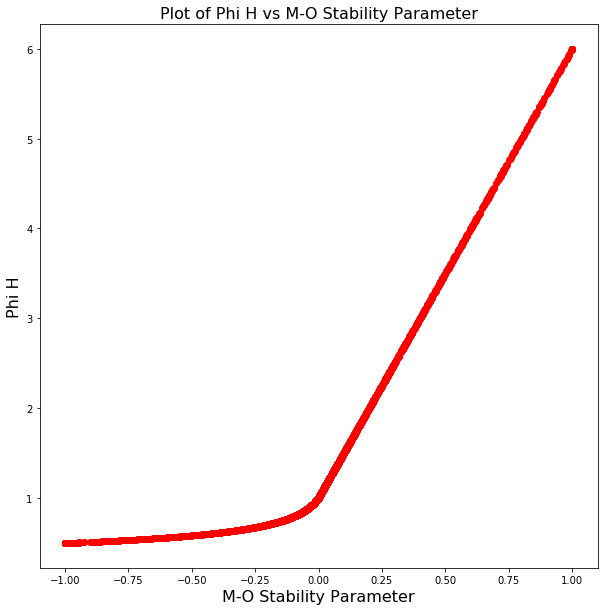

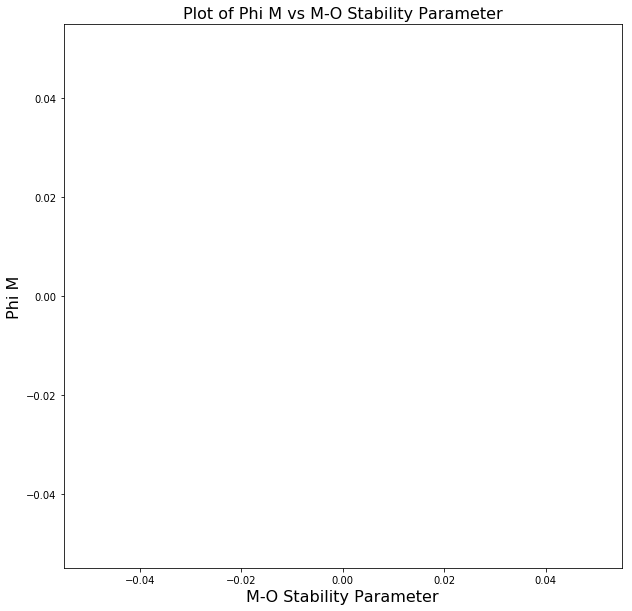

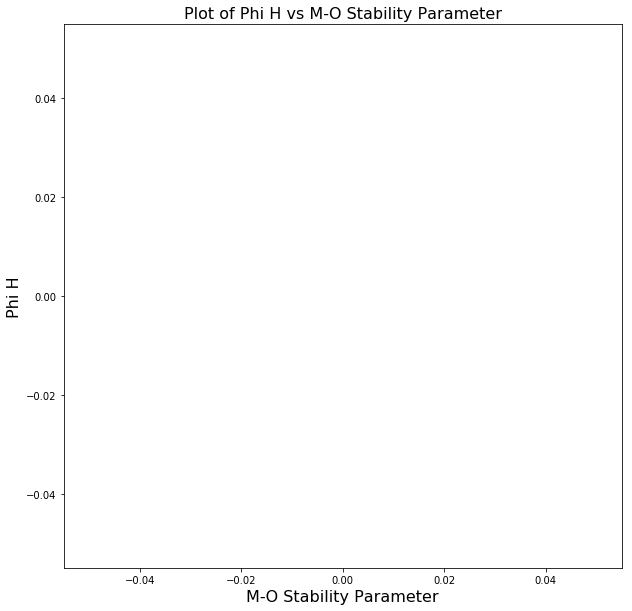

In [79]:
# Test the MO Similarity on the test dataset for the RF Predictions #
#--- Inputs
# Wind velocity at 10 m
u10 = datasetTest['10m U-Wind m/s']
v10 = datasetTest['10m V-Wind m/s']

# Skin temperature and temperature at 2 m
tsk = datasetTest['2m Temp K']
t2  = datasetTest['10m Temp K'] 
#
# Ground mixing ratio and mixing ratio at 2 m
qsfc, vap_pressure, sat_vap_pressure = mixing_ratio(datasetTest['2m Temp K']-273.15, 
                    datasetTest['2m RH %'], datasetTest['Barometric Pressure hpa'])
q2, vap_pressure, sat_vap_pressure    = mixing_ratio(datasetTest['2m Temp K']-273.15, 
                    datasetTest['2m RH %'], datasetTest['Barometric Pressure hpa'])
qsfc = qsfc / 1000
q2 = q2 /1000
#
# Surface pressure 
psfc = datasetTest['Barometric Pressure hpa']
#
# Momentum roughness length, heat flux roughness and reference level
z0  = .1
zt0 = z0
# Within the range of M-O Similarity Theory
phim=[]
zolm=[]
phih=[]
zolh=[]
t_2_out=[]
t_sk_out=[]
ustar_out=[]
tstar_out=[]
pred_ustar_out = []
pred_tstar_out = []
actual_ustar_out = []
actual_tstar_out = []

# Outside the range of M-O Similarity Theory
phimO=[]
zolmO=[]
phihO=[]
zolhO=[]
t_2_in=[]
t_sk_in=[]
ustar_in=[]
tstar_in=[]
pred_ustar_in = []
pred_tstar_in = []
actual_ustar_in = []
actual_tstar_in = []

#ustar,tstar,wthv0,zeta10,phim10,zeta2,phih2 = mo_similarity(u10,v10,tsk,t2,qsfc,q2,psfc,z0,zt0)
#
for i, val in enumerate(u10):
    ustar,tstar,wthv0,zeta10,phim10,zeta2,phih2 = mo_similarity(u10.iloc[i],v10.iloc[i],tsk.iloc[i],t2.iloc[i],qsfc.iloc[i],q2.iloc[i],psfc.iloc[i],z0,zt0)
    if ((zeta10 < -2.) | (zeta10 > 1.)):
        phimO.append(phim10)
        zolmO.append(zeta10)
        phihO.append(phih2)
        zolhO.append(zeta2)
        t_2_out.append(t2.iloc[i])
        t_sk_out.append(tsk.iloc[i])
        ustar_out.append(ustar)
        tstar_out.append(tstar)
        pred_ustar_out.append(predictionsF[i])
        pred_tstar_out.append(predictionsT[i])
        actual_ustar_out.append(test_labelsF.iloc[i])
        actual_tstar_out.append(test_labelsT.iloc[i])
        
    else:
        phim.append(phim10)
        zolm.append(zeta10)
        phih.append(phih2)
        zolh.append(zeta2)
        t_2_in.append(t2.iloc[i])
        t_sk_in.append(tsk.iloc[i])
        ustar_in.append(ustar)
        tstar_in.append(tstar)
        pred_ustar_in.append(predictionsF[i])
        pred_tstar_in.append(predictionsT[i])
        actual_ustar_in.append(test_labelsF.iloc[i])
        actual_tstar_in.append(test_labelsT.iloc[i])
    #
        #print("ustar = ",ustar,"  tstar = ",tstar," wthv0 = ",wthv0)
#
p=plt.plot(zolm,phim,'ro')
plt.title('Plot of Phi M vs M-O Stability Parameter', size = 16)
plt.xlabel('M-O Stability Parameter', size = 16)
plt.ylabel('Phi M', size = 16)
plt.show()
q=plt.plot(zolh,phih,'ro')
plt.title('Plot of Phi H vs M-O Stability Parameter', size = 16)
plt.xlabel('M-O Stability Parameter', size = 16)
plt.ylabel('Phi H', size = 16)
plt.show()
p=plt.plot(zolmO,phimO,'ro')
plt.title('Plot of Phi M vs M-O Stability Parameter', size = 16)
plt.xlabel('M-O Stability Parameter', size = 16)
plt.ylabel('Phi M', size = 16)
plt.show()
q=plt.plot(zolhO,phihO,'ro')
plt.title('Plot of Phi H vs M-O Stability Parameter', size = 16)
plt.xlabel('M-O Stability Parameter', size = 16)
plt.ylabel('Phi H', size = 16)
plt.show()

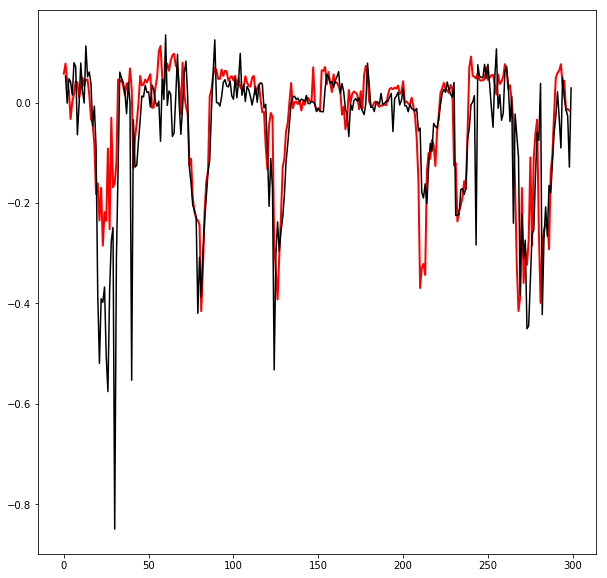

In [70]:
plt.plot(predictionsT[1:300],color="red", lw=2)
plt.plot(test_labelsT[1:300],color="k")

The R value is... 0.8165447555443744


/home/dgagne/miniconda3/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


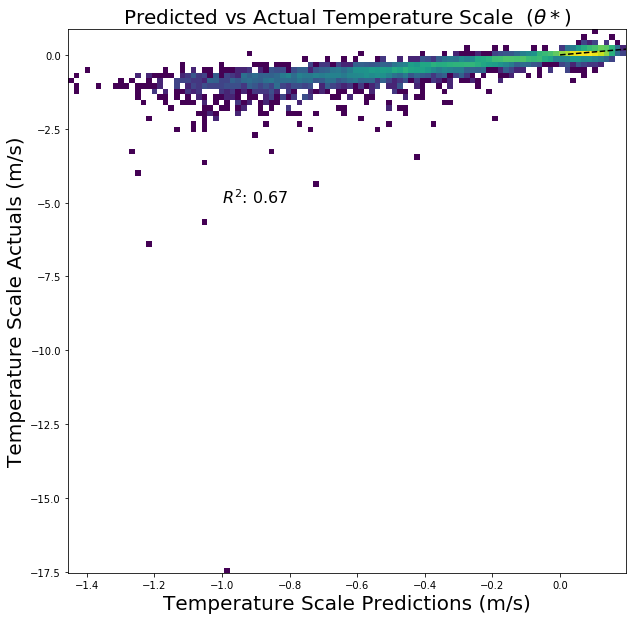

In [71]:
## Plots below after flux and met data are joined together...
from matplotlib.colors import LogNorm
plt.rcParams['figure.figsize'] = [10, 10]
x = predictionsT
y = test_labelsT
plt.hist2d(x, y, bins=100, cmin=1, norm=LogNorm())
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
r2 = np.corrcoef(x, y)[0, 1] ** 2
plt.text(-1,-5,"$R^2$: {0:0.2f}".format(r2),fontsize=16)
print("The R value is...",r_value)
plt.title('Predicted vs Actual Temperature Scale  ($\\theta *$)', size = 20)
plt.xlabel('Temperature Scale Predictions (m/s)', size = 20)
plt.ylabel('Temperature Scale Actuals (m/s)', size = 20)
plt.plot(np.linspace(0, 1.5), np.linspace(0, 1.5), 'k--')
plt.show()

The R value is... 0.6396908867306943


/home/dgagne/miniconda3/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


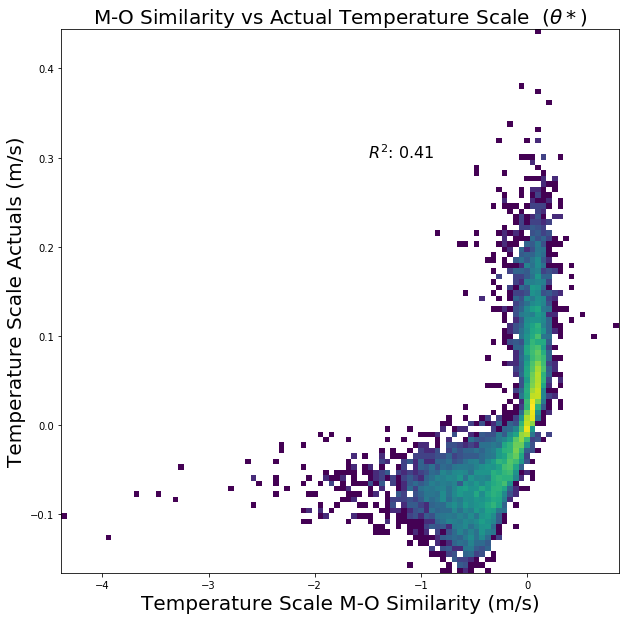

In [85]:
## Plots below after flux and met data are joined together...
from matplotlib.colors import LogNorm
plt.rcParams['figure.figsize'] = [10, 10]
x = np.array(actual_tstar_in)
y = np.array(tstar_in) 
y = y[x>-5] # Filter out a bad data point
x = x[x>-5] # Filter out a bad data point
plt.hist2d(x, y, bins=100, cmin=1, norm=LogNorm())
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
r2 = np.corrcoef(x, y)[0, 1] ** 2
plt.text(-1.5,0.3,"$R^2$: {0:0.2f}".format(r2),fontsize=16)
print("The R value is...",r_value)
plt.title('M-O Similarity vs Actual Temperature Scale  ($\\theta *$)', size = 20)
plt.xlabel('Temperature Scale M-O Similarity (m/s)', size = 20)
plt.ylabel('Temperature Scale Actuals (m/s)', size = 20)
#plt.plot(np.linspace(0, 1.5), np.linspace(0, 1.5), 'k--')
plt.show()

The R value is... 0.6611898958842489


/home/dgagne/miniconda3/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


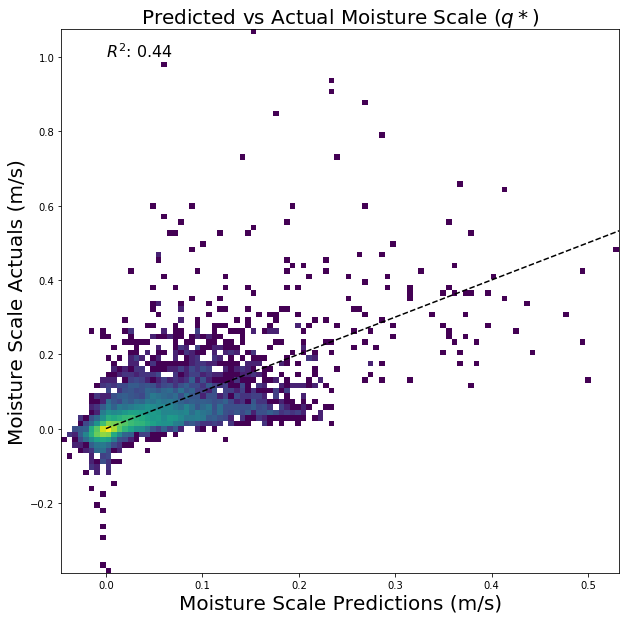

In [72]:
## Plots below after flux and met data are joined together...
from matplotlib.colors import LogNorm
plt.rcParams['figure.figsize'] = [10, 10]
x = predictionsM
y = test_labelsM
plt.hist2d(x, y, bins=100, cmin=1, norm=LogNorm())
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
r2 = np.corrcoef(x, y)[0, 1] ** 2
plt.text(0,1,"$R^2$: {0:0.2f}".format(r2),fontsize=16)
print("The R value is...",r_value)
plt.title('Predicted vs Actual Moisture Scale ($q*$)', size = 20)
plt.xlabel('Moisture Scale Predictions (m/s)', size = 20)
plt.ylabel('Moisture Scale Actuals (m/s)', size = 20)
plt.plot(np.linspace(0, 1.5), np.linspace(0, 1.5), 'k--')
plt.show()

The R value is... 0.950846360564481


/home/dgagne/miniconda3/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


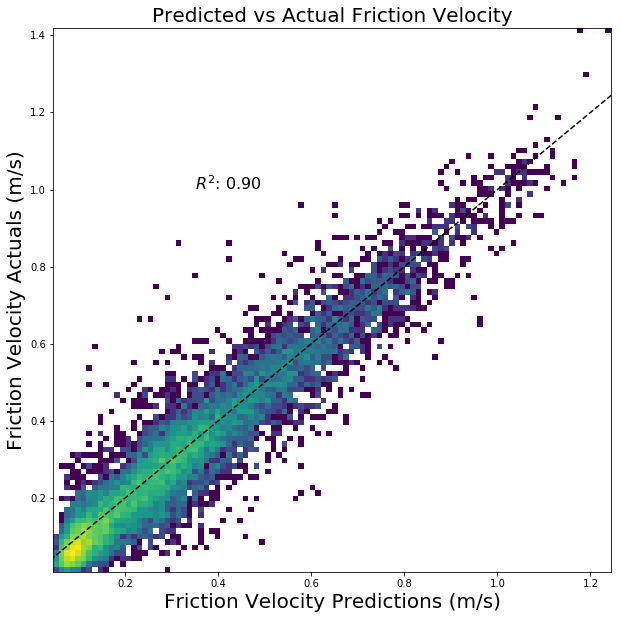

In [73]:
## Plots below after flux and met data are joined together...
from matplotlib.colors import LogNorm
plt.rcParams['figure.figsize'] = [10, 10]
x = predictionsF
y = test_labelsF
plt.hist2d(x, y, bins=100, cmin=1, norm=LogNorm())
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
r2 = np.corrcoef(x, y)[0, 1] ** 2
plt.text(0.35,1,"$R^2$: {0:0.2f}".format(r2),fontsize=16)
print("The R value is...",r_value)
plt.title('Predicted vs Actual Friction Velocity', size = 20)
plt.xlabel('Friction Velocity Predictions (m/s)', size = 20)
plt.ylabel('Friction Velocity Actuals (m/s)', size = 20)
plt.plot(np.linspace(0, 1.5), np.linspace(0, 1.5), 'k--')
plt.show()

The R value is... 0.9434792122971215


/home/dgagne/miniconda3/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


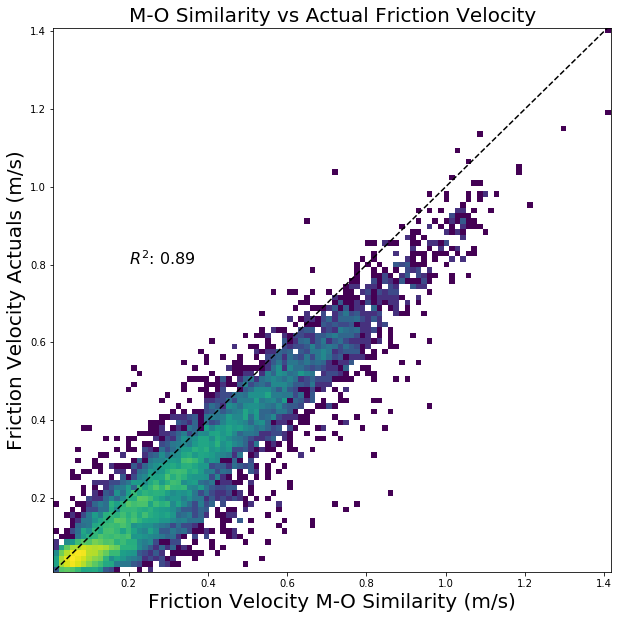

In [88]:
## Plots below after flux and met data are joined together...
from matplotlib.colors import LogNorm
plt.rcParams['figure.figsize'] = [10, 10]
x = np.array(actual_ustar_in)
y = np.array(ustar_in) 
y = y[x>-5] # Filter out a bad data point
x = x[x>-5] # Filter out a bad data point
plt.hist2d(x, y, bins=100, cmin=1, norm=LogNorm())
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
r2 = np.corrcoef(x, y)[0, 1] ** 2
plt.text(0.2,0.8,"$R^2$: {0:0.2f}".format(r2),fontsize=16)
print("The R value is...",r_value)
plt.title('M-O Similarity vs Actual Friction Velocity', size = 20)
plt.xlabel('Friction Velocity M-O Similarity (m/s)', size = 20)
plt.ylabel('Friction Velocity Actuals (m/s)', size = 20)
plt.plot(np.linspace(0, 1.5), np.linspace(0, 1.5), 'k--')
plt.show()